<a href="https://colab.research.google.com/github/Noman-Sajal/Employment-Rate-Prediction-by-Neural-Network/blob/main/final_work_80_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the downloaded JSON file
with open('countries_data.json', 'r') as file:
    countries_data = json.load(file)

# Extract country, continent, area, latitude, and longitude information
country_info_list = []
for country in countries_data:
    country_name = country.get('name', {}).get('common')
    continent = country.get('region')
    area = country.get('area')  # Get the area
    latlng = country.get('latlng', [])  # Get latitude and longitude
    latitude = latlng[0] if len(latlng) > 0 else None  # First element is latitude
    longitude = latlng[1] if len(latlng) > 1 else None  # Second element is longitude

    country_info_list.append({
        'Country Name': country_name,
        'Continent': continent,
        'Area': area,
        'Latitude': latitude,
        'Longitude': longitude
    })

# Convert the country information into a DataFrame
country_info_df = pd.DataFrame(country_info_list)

# Display the first few rows to verify the changes
print(country_info_df.head())


    Country Name  Continent     Area   Latitude  Longitude
0  South Georgia  Antarctic   3903.0 -54.500000 -37.000000
1        Grenada   Americas    344.0  12.116667 -61.666667
2    Switzerland     Europe  41284.0  47.000000   8.000000
3   Sierra Leone     Africa  71740.0   8.500000 -11.500000
4        Hungary     Europe  93028.0  47.000000  20.000000


In [120]:
# Load the World Bank datasets
gdp_df = pd.read_csv('gdp_data.csv')
labor_force_df = pd.read_csv('labor_force_data.csv')
inflation_df = pd.read_csv('inflation_data.csv')
population_growth_df = pd.read_csv('population_growth_data.csv')
gdp_growth_df = pd.read_csv('gdp_growth_data.csv')
trade_df = pd.read_csv('trade_data.csv')
employment_df = pd.read_csv('employment_data.csv')


In [121]:
# Create a set of unique country names from both datasets to check mismatches
world_bank_countries = set(gdp_df['Country Name'].unique())
api_countries = set(country_info_df['Country Name'].unique())

# Find mismatches: Countries in the World Bank dataset not in the API dataset
mismatched_countries = world_bank_countries - api_countries

# Display mismatched countries
print(f"Number of mismatched countries: {len(mismatched_countries)}")
print("Mismatched countries:", mismatched_countries)


# Dictionary to map country names from API to World Bank dataset format
country_name_mapping = {
    'Bahamas': 'Bahamas, The',
    'Brunei': 'Brunei Darussalam',
    'Cape Verde': 'Cabo Verde',
    'Republic of the Congo': 'Congo, Rep.',
    'DR Congo':'Congo, Dem. Rep.',
    'Ivory Coast':"Cote d'Ivoire",
    'Curaçao': 'Curacao',
    'Egypt': 'Egypt, Arab Rep.',
    'Gambia': 'Gambia, The',
    'Hong Kong': 'Hong Kong SAR, China',
    'Iran': 'Iran, Islamic Rep.',
    'North Korea': 'Korea, Dem. People’s Rep.',
    'South Korea': 'Korea, Rep.',
    'Kyrgyzstan': 'Kyrgyz Republic',
    'Yemen': 'Yemen, Rep.',
    'Laos': 'Lao PDR',
    'Macau': 'Macao SAR, China',
    'Micronesia': 'Micronesia, Fed. Sts.',
    'Russia': 'Russian Federation',
    'São Tomé and Príncipe': 'Sao Tome and Principe',
    'Sint Maarten': 'Sint Maarten (Dutch part)',
    'Slovakia': 'Slovak Republic',
    'Saint Kitts and Nevis': 'St. Kitts and Nevis',
    'Saint Lucia': 'St. Lucia',
    'Saint Martin': 'St. Martin (French part)',
    'Saint Vincent and the Grenadines': 'St. Vincent and the Grenadines',
    'British Virgin Islands': 'Virgin Islands (U.S.)',
    'Syria': 'Syrian Arab Republic',
    'Turkey': 'Turkiye',
    'Venezuela': 'Venezuela, RB',
    'Vietnam': 'Viet Nam'
}


Number of mismatched countries: 34
Mismatched countries: {'Channel Islands', nan, 'West Bank and Gaza', 'Sint Maarten (Dutch part)', 'Gambia, The', "Cote d'Ivoire", 'Venezuela, RB', 'Egypt, Arab Rep.', 'St. Martin (French part)', 'Viet Nam', 'Virgin Islands (U.S.)', 'Korea, Rep.', 'Yemen, Rep.', 'Brunei Darussalam', 'Cabo Verde', "Korea, Dem. People's Rep.", 'Kyrgyz Republic', 'Sao Tome and Principe', 'Congo, Rep.', 'St. Vincent and the Grenadines', 'Micronesia, Fed. Sts.', 'Lao PDR', 'St. Lucia', 'St. Kitts and Nevis', 'Congo, Dem. Rep.', 'Russian Federation', 'Bahamas, The', 'Syrian Arab Republic', 'Hong Kong SAR, China', 'Iran, Islamic Rep.', 'Curacao', 'Turkiye', 'Macao SAR, China', 'Slovak Republic'}


In [122]:
# Define a function to merge datasets and reorder columns
def merge_and_reorder(df, country_info_df):
    merged_df = pd.merge(df, country_info_df, on='Country Name', how='left')

    # Reorder columns to place 'Continent', 'Area', 'Latitude', and 'Longitude' in the desired positions
    columns = merged_df.columns.tolist()
    columns_to_move = ['Continent', 'Area', 'Latitude', 'Longitude']

    # Remove the columns from their current positions
    for col in columns_to_move:
        columns.remove(col)

    # Insert the columns in the desired positions (after 'Country Name' and 'Country Code')
    for i, col in enumerate(columns_to_move):
        columns.insert(3 + i, col)  # Insert starting at index 3 for 4th position

    # Reorder the DataFrame using the new column order
    return merged_df[columns]

# Function to clean unwanted footer text (Meta Data) from DataFrames
def clean_footer(df):
    # Replace footer text with NaN
    footer_texts = ["Data from database: World Development Indicators", "Last Updated: 09/19/2024"]
    for footer in footer_texts:
        df.replace(footer, pd.NA, inplace=True)
    return df.dropna(how='all')
# Merge each dataset with country_info_df and clean footer texts
gdp_merged = clean_footer(merge_and_reorder(gdp_df, country_info_df))
labor_force_merged = clean_footer(merge_and_reorder(labor_force_df, country_info_df))
inflation_merged = clean_footer(merge_and_reorder(inflation_df, country_info_df))
population_growth_merged = clean_footer(merge_and_reorder(population_growth_df, country_info_df))
gdp_growth_merged = clean_footer(merge_and_reorder(gdp_growth_df, country_info_df))
trade_merged = clean_footer(merge_and_reorder(trade_df, country_info_df))
employment_merged = clean_footer(merge_and_reorder(employment_df, country_info_df))

# Step 11: Concatenate all merged datasets into a single DataFrame
combined_df = pd.concat([
    gdp_merged,
    labor_force_merged,
    inflation_merged,
    population_growth_merged,
    gdp_growth_merged,
    trade_merged,
    employment_merged
], ignore_index=True)

# Display the first few rows and check the shape of the combined dataset
print("Shape of the combined DataFrame:", combined_df.shape)
combined_df.head()


Shape of the combined DataFrame: (1519, 32)


,Series Name,Series Code,Country Name,Continent,Area,Latitude,Longitude,Country Code,2000 [YR2000],2001 [YR2001],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,GDP (current US$),NY.GDP.MKTP.CD,Afghanistan,Asia,652230.0,33.000000,65.0,AFG,3521418059.92345,2813571753.87253,...,20497128555.6972,19134221644.7325,18116572395.0772,18753456497.8159,18053222687.4126,18799444490.1128,19955929052.1496,14266499429.8746,14502158192.0904,..
1,GDP (current US$),NY.GDP.MKTP.CD,Albania,Europe,28748.0,41.000000,20.0,ALB,3480355258.04122,3922100793.5403,...,13228147516.1168,11386853113.0189,11861199830.8396,13019726211.7369,15156424015.1977,15401826127.2539,15162734205.2462,17930565118.8176,18916378860.5488,22977677860.7979
2,GDP (current US$),NY.GDP.MKTP.CD,Algeria,Africa,2381741.0,28.000000,3.0,DZA,54790398570.3282,59413400923.6364,...,238942664192.59,187493855609.345,180763839522.151,189880896903.073,194554483655.528,193459662090.677,164873415325.201,186265418570.697,225560256621.757,239899491127.742
3,GDP (current US$),NY.GDP.MKTP.CD,American Samoa,Oceania,199.0,-14.333333,-170.0,ASM,..,..,...,643000000,673000000,671000000,612000000,639000000,647000000,721000000,750000000,871000000,..
4,GDP (current US$),NY.GDP.MKTP.CD,Andorra,Europe,468.0,42.500000,1.5,AND,1432606188.69324,1548265808.05802,...,3271685596.66321,2789881258.50362,2896610479.73077,3000162081.11976,3218419896.9641,3155149347.80639,2891001149.3611,3324683011.5903,3380602042.84283,3727673593.01922


In [123]:
# Handle missing values by counting NaNs, zeros, and placeholder values
nan_count = combined_df.isna().sum().sum()
zero_count = (combined_df == 0).sum().sum()
placeholder_count = (combined_df == '..').sum().sum()

# Display the counts of missing values
print(f"Total NaN values: {nan_count}")
print(f"Total 0 values: {zero_count}")
print(f"Total placeholder values ('..'): {placeholder_count}")
# Check the shape
print("Shape of the DataFrame:", combined_df.shape)


Total NaN values: 924
Total 0 values: 0
Total placeholder values ('..'): 3806
Shape of the DataFrame: (1519, 32)


In [124]:
# Replace '..' with NaN
combined_df.replace('..', pd.NA, inplace=True)

# Drop rows where 'Continent' is NaN or empty or 0
combined_df = combined_df.dropna(subset=['Continent'])
# combined_df = combined_df[combined_df['Continent'] != 0]

# Display the shape of the DataFrame after dropping rows
print("Shape of the DataFrame after dropping rows with NaN or empty values in 'Continent':", combined_df.shape)

# Display the first few rows to verify the changes
combined_df.head()


Shape of the DataFrame after dropping rows with NaN or empty values in 'Continent': (1288, 32)


,Series Name,Series Code,Country Name,Continent,Area,Latitude,Longitude,Country Code,2000 [YR2000],2001 [YR2001],...,2014 [YR2014],2015 [YR2015],2016 [YR2016],2017 [YR2017],2018 [YR2018],2019 [YR2019],2020 [YR2020],2021 [YR2021],2022 [YR2022],2023 [YR2023]
0,GDP (current US$),NY.GDP.MKTP.CD,Afghanistan,Asia,652230.0,33.000000,65.0,AFG,3521418059.92345,2813571753.87253,...,20497128555.6972,19134221644.7325,18116572395.0772,18753456497.8159,18053222687.4126,18799444490.1128,19955929052.1496,14266499429.8746,14502158192.0904,<NA>
1,GDP (current US$),NY.GDP.MKTP.CD,Albania,Europe,28748.0,41.000000,20.0,ALB,3480355258.04122,3922100793.5403,...,13228147516.1168,11386853113.0189,11861199830.8396,13019726211.7369,15156424015.1977,15401826127.2539,15162734205.2462,17930565118.8176,18916378860.5488,22977677860.7979
2,GDP (current US$),NY.GDP.MKTP.CD,Algeria,Africa,2381741.0,28.000000,3.0,DZA,54790398570.3282,59413400923.6364,...,238942664192.59,187493855609.345,180763839522.151,189880896903.073,194554483655.528,193459662090.677,164873415325.201,186265418570.697,225560256621.757,239899491127.742
3,GDP (current US$),NY.GDP.MKTP.CD,American Samoa,Oceania,199.0,-14.333333,-170.0,ASM,<NA>,<NA>,...,643000000,673000000,671000000,612000000,639000000,647000000,721000000,750000000,871000000,<NA>
4,GDP (current US$),NY.GDP.MKTP.CD,Andorra,Europe,468.0,42.500000,1.5,AND,1432606188.69324,1548265808.05802,...,3271685596.66321,2789881258.50362,2896610479.73077,3000162081.11976,3218419896.9641,3155149347.80639,2891001149.3611,3324683011.5903,3380602042.84283,3727673593.01922


In [125]:

#  Melt the dataframe, including additional columns for 'Longitude', 'Latitude', and 'Area'
melted_df = combined_df.melt(
    id_vars=['Country Name', 'Continent', 'Longitude', 'Latitude', 'Area', 'Series Name'],
    value_vars=[col for col in combined_df.columns if '[YR' in col],
    var_name='Year',
    value_name='Value'
)

# Clean 'Year' to extract only the year number and ensure it's an integer
melted_df['Year'] = melted_df['Year'].str.extract(r'(\d{4})').astype(int)

# Ensure 'Value' is numeric, converting any non-numeric entries to NaN
melted_df['Value'] = pd.to_numeric(melted_df['Value'], errors='coerce')

# Pivot on 'Country Name' and 'Year' to get year-wise data per country and indicator
pivoted_df = melted_df.pivot_table(
    index=['Country Name', 'Continent', 'Longitude', 'Latitude', 'Area', 'Year'],
    columns='Series Name',
    values='Value'
).reset_index()

# Flatten the columns after pivoting
pivoted_df.columns.name = None

# Convert 'Year' column to integer (if it somehow turns into a float during processing)
pivoted_df['Year'] = pivoted_df['Year'].astype(int)

#  Define the threshold for missing values (10%)
threshold = 0.1  # 10%
threshold_num = int(pivoted_df.shape[1] * threshold)

# Drop rows where NaN, empty, '0', or placeholder values exceed the threshold
rows_to_drop = pivoted_df[
    (pivoted_df.isna().sum(axis=1) > threshold_num) |
    ((pivoted_df == '').sum(axis=1) > threshold_num) |
    ((pivoted_df == '..').sum(axis=1) > threshold_num) |
    ((pivoted_df == 0).sum(axis=1) > threshold_num)
]

pivoted_df.drop(rows_to_drop.index, inplace=True)

#  Convert all columns to numeric where applicable, handling non-numerical values as NaN
pivoted_df.iloc[:, 6:] = pivoted_df.iloc[:, 6:].apply(pd.to_numeric, errors='coerce')  # Start from the 7th column onward for data

# Fill remaining missing values in the data columns (assuming columns after 'Year' are indicators)
pivoted_df.iloc[:, 6:] = pivoted_df.iloc[:, 6:].bfill(axis=1)
pivoted_df.iloc[:, 6:] = pivoted_df.iloc[:, 6:].ffill(axis=1)

# Final check
print("Shape of the DataFrame after handling missing values:", pivoted_df.shape)
pivoted_df.head()


Shape of the DataFrame after handling missing values: (3698, 13)


,Country Name,Continent,Longitude,Latitude,Area,Year,"Employment to population ratio, 15+, total (%) (modeled ILO estimate)",GDP (current US$),GDP growth (annual %),"Inflation, consumer prices (annual %)","Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)",Population growth (annual %),Trade (% of GDP)
5,Afghanistan,Asia,65.0,33.0,652230.0,2005,43.311,6.203257e+09,11.229715,12.686269,47.039,3.576508,3.576508
6,Afghanistan,Asia,65.0,33.0,652230.0,2006,43.259,6.971758e+09,5.357403,6.784597,46.983,4.139678,4.139678
7,Afghanistan,Asia,65.0,33.0,652230.0,2007,43.216,9.747886e+09,13.826320,8.680571,46.935,1.793196,1.793196
8,Afghanistan,Asia,65.0,33.0,652230.0,2008,43.178,1.010930e+10,3.924984,26.418664,46.896,2.002333,2.002333
9,Afghanistan,Asia,65.0,33.0,652230.0,2009,43.153,1.241615e+10,21.390528,-6.811161,46.867,3.561288,3.561288


In [126]:
# Count the number of rows for each country
country_row_counts = pivoted_df['Country Name'].value_counts().reset_index()

# Rename columns for clarity
country_row_counts.columns = ['Country Name', 'Row Count']

# Display the entire DataFrame without truncation
pd.set_option('display.max_rows', None)  # Show all rows
print("Full list of row counts for each country:")
print(country_row_counts)


Full list of row counts for each country:
                 Country Name  Row Count
0                      Israel         24
1                    Mongolia         24
2                        Mali         24
3                       Malta         24
4                  Mauritania         24
5                   Mauritius         24
6                      Mexico         24
7                     Moldova         24
8                  Montenegro         24
9                     Ireland         24
10                    Morocco         24
11                 Mozambique         24
12        Trinidad and Tobago         24
13                    Namibia         24
14                      Nepal         24
15                Netherlands         24
16                   Maldives         24
17                   Malaysia         24
18                     Malawi         24
19                 Madagascar         24
20                 Luxembourg         24
21                  Lithuania         24
22             

In [127]:
#  Count the number of years of data for each country
country_row_counts = pivoted_df['Country Name'].value_counts().reset_index()
country_row_counts.columns = ['Country Name', 'Row Count']

# Filter out countries with less than 17 years of data
filtered_country_row_counts_df = country_row_counts[country_row_counts['Row Count'] >= 17]

# Get the list of valid countries
valid_countries = filtered_country_row_counts_df['Country Name'].tolist()

# Filter the main pivoted_df to only include rows from valid countries
filtered_main_df = pivoted_df[pivoted_df['Country Name'].isin(valid_countries)]


# Drop the year 2023 from the filtered DataFrame
filtered_main_df = filtered_main_df[filtered_main_df['Year'] != 2023]

# Display the shape of the DataFrame after dropping 2023
print("Shape of the DataFrame after dropping the year 2023:", filtered_main_df.shape)
filtered_main_df.head()  # Display the first few rows of the updated DataFrame



Shape of the DataFrame after dropping the year 2023: (3515, 13)


,Country Name,Continent,Longitude,Latitude,Area,Year,"Employment to population ratio, 15+, total (%) (modeled ILO estimate)",GDP (current US$),GDP growth (annual %),"Inflation, consumer prices (annual %)","Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)",Population growth (annual %),Trade (% of GDP)
5,Afghanistan,Asia,65.0,33.0,652230.0,2005,43.311,6.203257e+09,11.229715,12.686269,47.039,3.576508,3.576508
6,Afghanistan,Asia,65.0,33.0,652230.0,2006,43.259,6.971758e+09,5.357403,6.784597,46.983,4.139678,4.139678
7,Afghanistan,Asia,65.0,33.0,652230.0,2007,43.216,9.747886e+09,13.826320,8.680571,46.935,1.793196,1.793196
8,Afghanistan,Asia,65.0,33.0,652230.0,2008,43.178,1.010930e+10,3.924984,26.418664,46.896,2.002333,2.002333
9,Afghanistan,Asia,65.0,33.0,652230.0,2009,43.153,1.241615e+10,21.390528,-6.811161,46.867,3.561288,3.561288


In [128]:
# Check basic statistics and data types
print(filtered_main_df.info())
print(filtered_main_df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 3515 entries, 5 to 4414
Data columns (total 13 columns):
 #   Column                                                                                         Non-Null Count  Dtype  
---  ------                                                                                         --------------  -----  
 0   Country Name                                                                                   3515 non-null   object 
 1   Continent                                                                                      3515 non-null   object 
 2   Longitude                                                                                      3515 non-null   float64
 3   Latitude                                                                                       3515 non-null   float64
 4   Area                                                                                           3515 non-null   float64
 5   Year                     

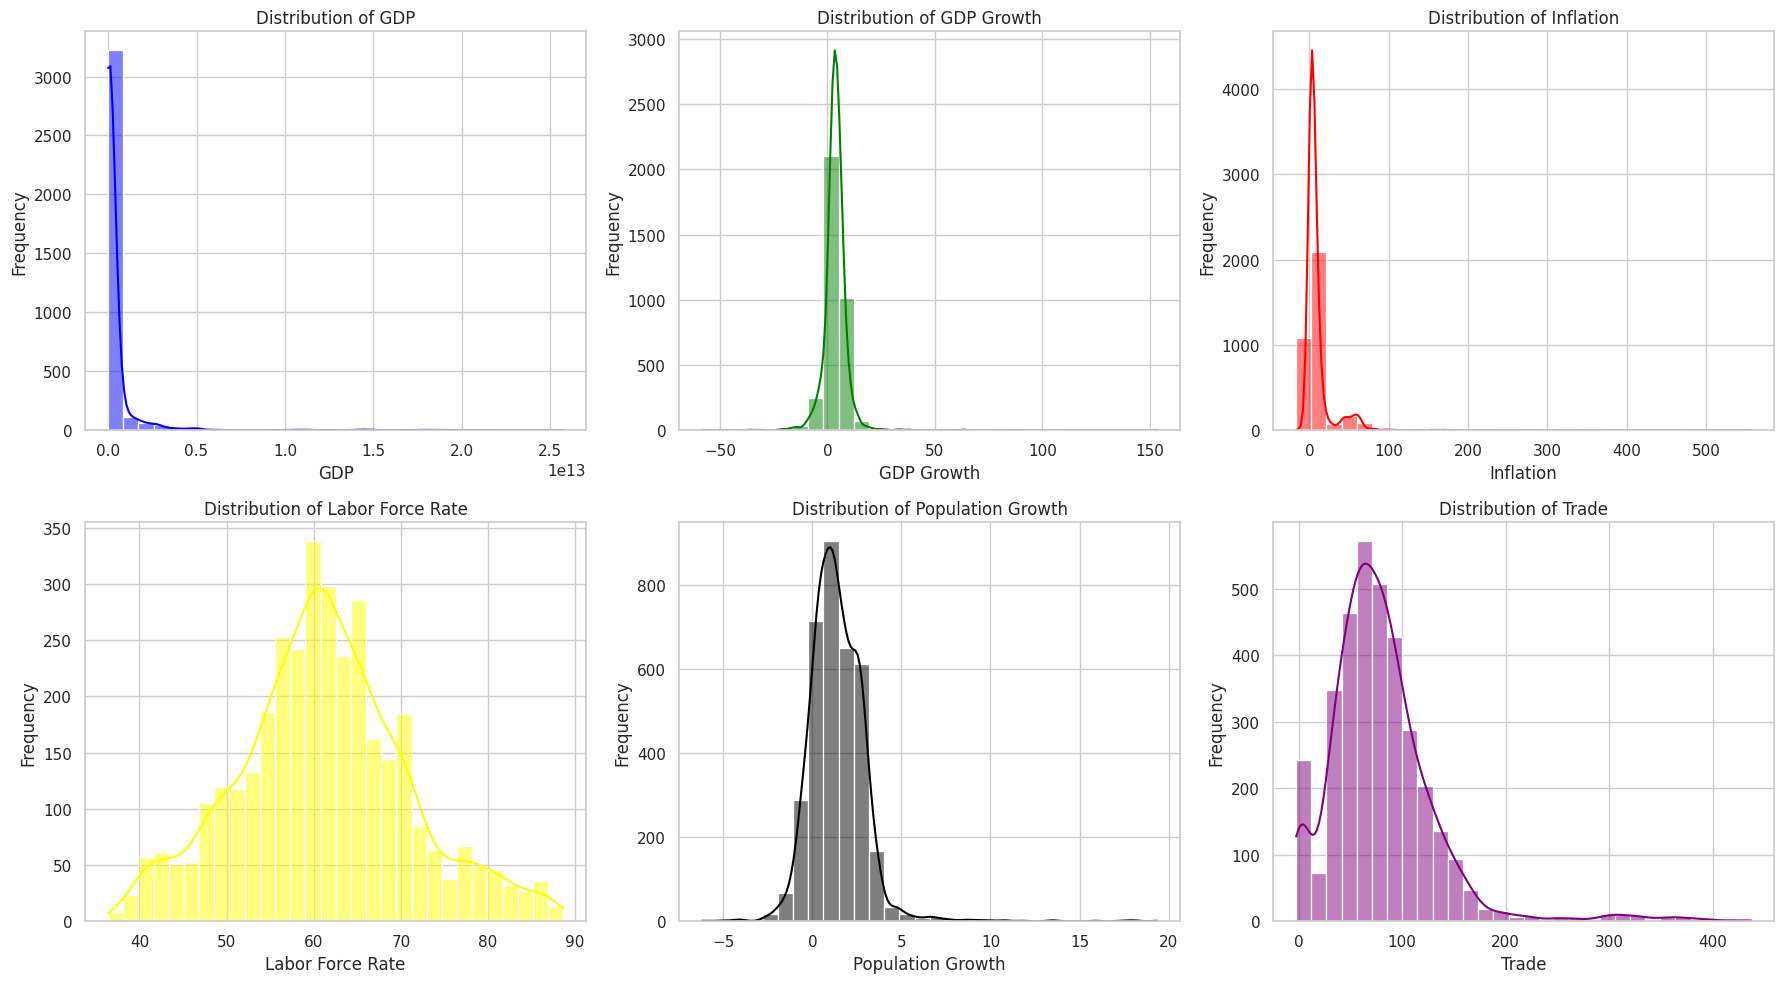

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the required columns for prediction and analysis
df = filtered_main_df[['Country Name', 'Continent', 'Year',
         'Employment to population ratio, 15+, total (%) (modeled ILO estimate)',
         'GDP (current US$)', 'GDP growth (annual %)',
         'Inflation, consumer prices (annual %)',
         'Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)',
         'Population growth (annual %)', 'Trade (% of GDP)']]

# Rename columns for better readability
df_renamed = df.rename(columns={
    'GDP (current US$)': 'GDP',
    'GDP growth (annual %)': 'GDP Growth',
    'Inflation, consumer prices (annual %)': 'Inflation',
    'Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)': 'Labor Force Rate',
    'Population growth (annual %)': 'Population Growth',
    'Trade (% of GDP)': 'Trade',
    'Employment to population ratio, 15+, total (%) (modeled ILO estimate)': 'Employment Rate'
})

# **Feature Distribution (Histograms) for Input Features**
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# List of input features and their respective colors
input_features = ['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']
colors = ['blue', 'green', 'red', 'yellow', 'black', 'purple']

# Plot histograms with different colors
for i, (feature, color) in enumerate(zip(input_features, colors)):
    sns.histplot(df_renamed[feature], ax=axes[i//3, i%3], kde=True, bins=30, color=color)
    axes[i//3, i%3].set_title(f'Distribution of {feature}')
    axes[i//3, i%3].set_xlabel(feature)
    axes[i//3, i%3].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


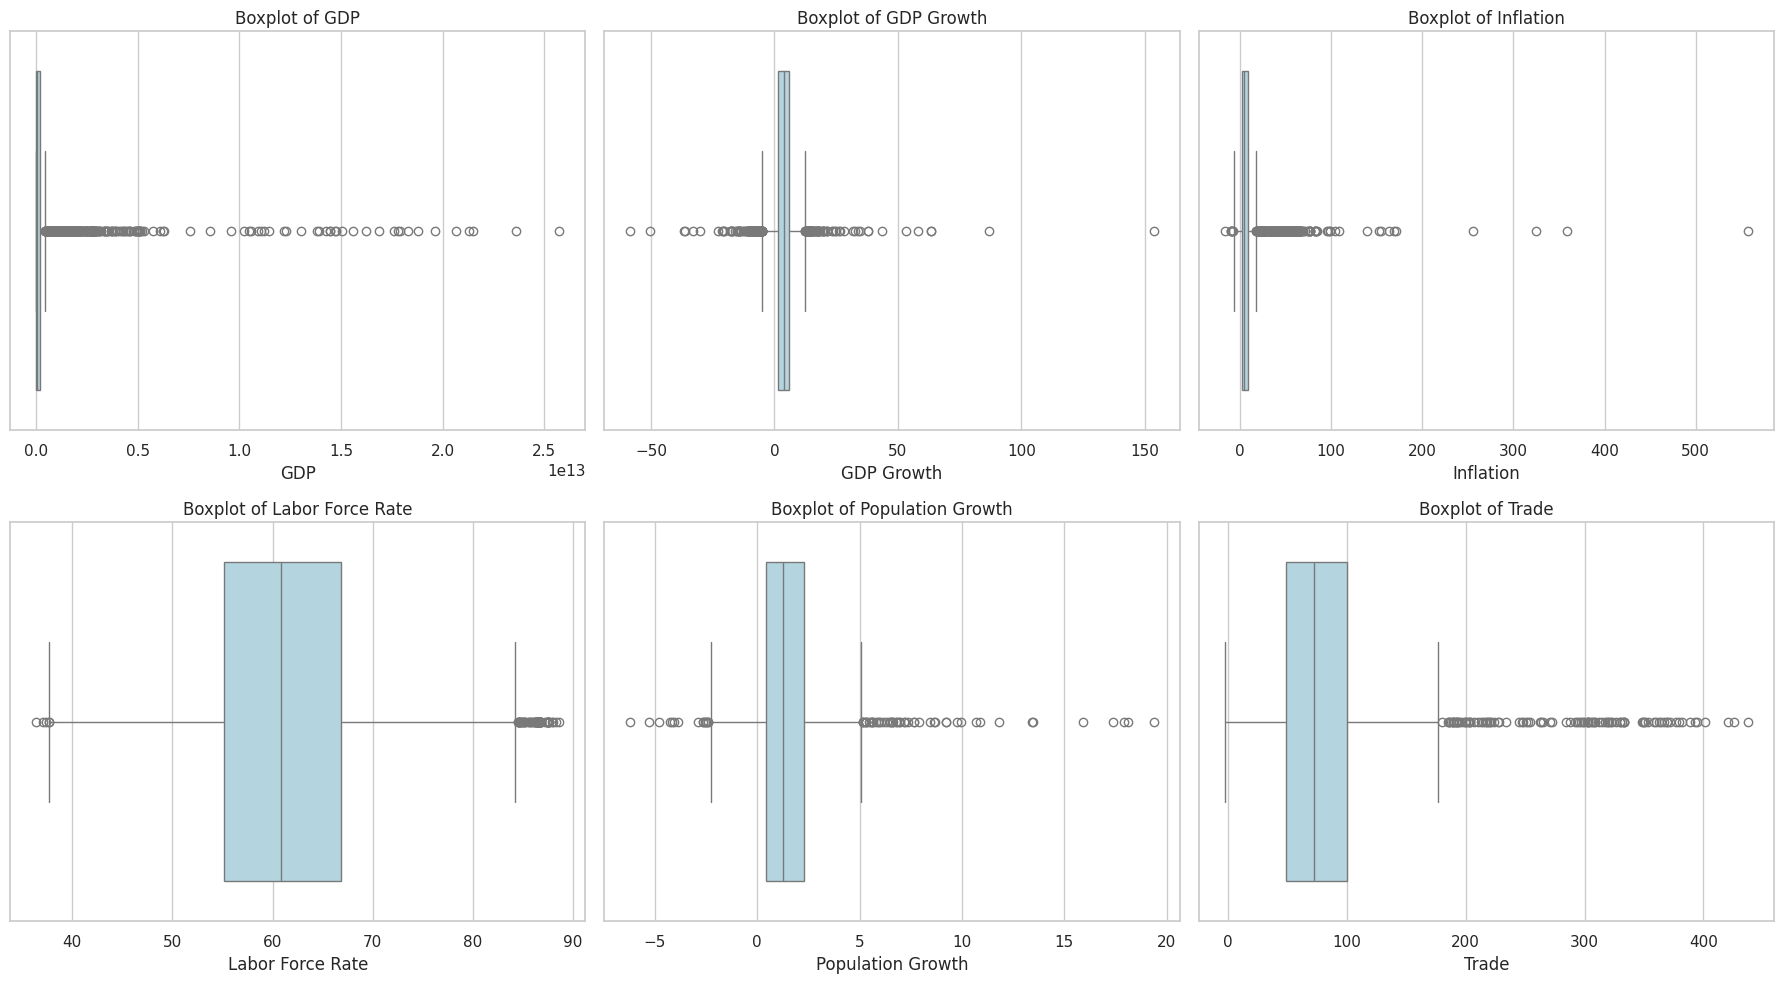

In [130]:
# Check for outliers using boxplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, feature in enumerate(input_features):
    sns.boxplot(x=df_renamed[feature], ax=axes[i//3, i%3], color='lightblue')
    axes[i//3, i%3].set_title(f'Boxplot of {feature}')
    axes[i//3, i%3].set_xlabel(feature)

plt.tight_layout()
plt.show()


In [131]:
from sklearn.preprocessing import StandardScaler

# Select numeric features for scaling
numeric_features = ['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']

# Initialize the scaler
scaler = StandardScaler()

# Scale the numeric features
df_renamed[numeric_features] = scaler.fit_transform(df_renamed[numeric_features])

# Check the scaled values
print(df_renamed.head())


  Country Name Continent  Year  Employment Rate       GDP  GDP Growth  \
5  Afghanistan      Asia  2005           43.311 -0.236663    1.230864   
6  Afghanistan      Asia  2006           43.259 -0.236202    0.272020   
7  Afghanistan      Asia  2007           43.216 -0.234537    1.654843   
8  Afghanistan      Asia  2008           43.178 -0.234321    0.038131   
9  Afghanistan      Asia  2009           43.153 -0.232937    2.889944   

   Inflation  Labor Force Rate  Population Growth     Trade  
5   0.151142         -1.442052           1.381362 -1.441126  
6  -0.135433         -1.447786           1.736699 -1.430416  
7  -0.043368         -1.452700           0.256165 -1.475040  
8   0.817964         -1.456693           0.388122 -1.471062  
9  -0.795620         -1.459663           1.371759 -1.441415  


In [132]:
# One-hot encoding for categorical variables (if necessary)
df_encoded = pd.get_dummies(df_renamed, columns=['Country Name', 'Continent'], drop_first=True)

# Check the encoded dataset
print(df_encoded.head())


   Year  Employment Rate       GDP  GDP Growth  Inflation  Labor Force Rate  \
5  2005           43.311 -0.236663    1.230864   0.151142         -1.442052   
6  2006           43.259 -0.236202    0.272020  -0.135433         -1.447786   
7  2007           43.216 -0.234537    1.654843  -0.043368         -1.452700   
8  2008           43.178 -0.234321    0.038131   0.817964         -1.456693   
9  2009           43.153 -0.232937    2.889944  -0.795620         -1.459663   

   Population Growth     Trade  Country Name_Albania  Country Name_Algeria  \
5           1.381362 -1.441126                 False                 False   
6           1.736699 -1.430416                 False                 False   
7           0.256165 -1.475040                 False                 False   
8           0.388122 -1.471062                 False                 False   
9           1.371759 -1.441415                 False                 False   

   ...  Country Name_United States  Country Name_Uruguay

In [133]:
# Calculate IQR for each feature and remove outliers
Q1 = df_renamed[numeric_features].quantile(0.25)
Q3 = df_renamed[numeric_features].quantile(0.75)
IQR = Q3 - Q1

# Remove rows with outliers
df_no_outliers = df_renamed[~((df_renamed[numeric_features] < (Q1 - 1.5 * IQR)) | (df_renamed[numeric_features] > (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"Original dataset size: {df_renamed.shape[0]}")
print(f"Dataset size after removing outliers: {df_no_outliers.shape[0]}")


Original dataset size: 3515
Dataset size after removing outliers: 2332


In [134]:
# Ensure that you are using the correct numeric columns for clipping
numeric_features = ['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']

# Cap values based on the IQR method
lower_bound = Q1[numeric_features] - 1.5 * IQR[numeric_features]
upper_bound = Q3[numeric_features] + 1.5 * IQR[numeric_features]

# Clip the values within the bounds
df_capped = df_renamed.copy()

# Clip values outside the bounds for each feature
for feature in numeric_features:
    df_capped[feature] = df_capped[feature].clip(lower=lower_bound[feature], upper=upper_bound[feature])

# Check the dataset after capping outliers
print(f"Dataset after capping outliers:\n{df_capped.describe()}")


Dataset after capping outliers:
              Year  Employment Rate          GDP   GDP Growth    Inflation  \
count  3515.000000      3515.000000  3515.000000  3515.000000  3515.000000   
mean   2011.007397        56.707754    -0.169643    -0.005781    -0.182140   
std       6.606507        11.049559     0.094946     0.618870     0.272102   
min    2000.000000        29.903000    -0.240275    -1.410803    -0.843960   
25%    2005.000000        49.890500    -0.235145    -0.345011    -0.375481   
50%    2011.000000        56.547000    -0.221911     0.009284    -0.273781   
75%    2017.000000        63.316500    -0.129531     0.365516    -0.063162   
max    2022.000000        88.518000     0.028891     1.431308     0.405317   

       Labor Force Rate  Population Growth        Trade  
count       3515.000000        3515.000000  3515.000000  
mean          -0.003496          -0.026068    -0.058311  
std            0.991009           0.839094     0.783028  
min           -2.399116          

In [135]:
import numpy as np
from scipy.stats import mstats
from sklearn.preprocessing import StandardScaler

# Step 1: Apply Log Transformation to GDP (only for positive values)
df_capped['GDP'] = df_capped['GDP'].apply(lambda x: np.log(x) if x > 0 else x)

# Step 2: Apply Winsorization to GDP Growth, Inflation, and Labor Force Rate
numeric_features_winsorize = ['GDP Growth', 'Inflation', 'Labor Force Rate']
for feature in numeric_features_winsorize:
    df_capped[feature] = mstats.winsorize(df_capped[feature], limits=[0.05, 0.05])  # Cap at 5th and 95th percentile

# Step 3: Standardize Labor Force Rate, Population Growth, and Trade
scaler = StandardScaler()
df_capped[['Labor Force Rate', 'Population Growth', 'Trade']] = scaler.fit_transform(
    df_capped[['Labor Force Rate', 'Population Growth', 'Trade']]
)

# Show the transformed data
print("Dataset after transformations:")
print(df_capped.describe())


Dataset after transformations:
              Year  Employment Rate          GDP   GDP Growth    Inflation  \
count  3515.000000      3515.000000  3515.000000  3515.000000  3515.000000   
mean   2011.007397        56.707754    -0.703684    -0.011293    -0.179190   
std       6.606507        11.049559     1.247529     0.575090     0.267911   
min    2000.000000        29.903000   -10.153350    -1.242493    -0.478389   
25%    2005.000000        49.890500    -0.238741    -0.345011    -0.375481   
50%    2011.000000        56.547000    -0.231901     0.009284    -0.273781   
75%    2017.000000        63.316500    -0.204780     0.365516    -0.063162   
max    2022.000000        88.518000    -0.000361     1.081580     0.405317   

       Labor Force Rate  Population Growth         Trade  
count      3.515000e+03       3.515000e+03  3.515000e+03  
mean       8.085835e-18      -2.425750e-17  1.415021e-17  
std        1.000142e+00       1.000142e+00  1.000142e+00  
min       -1.867541e+00      -

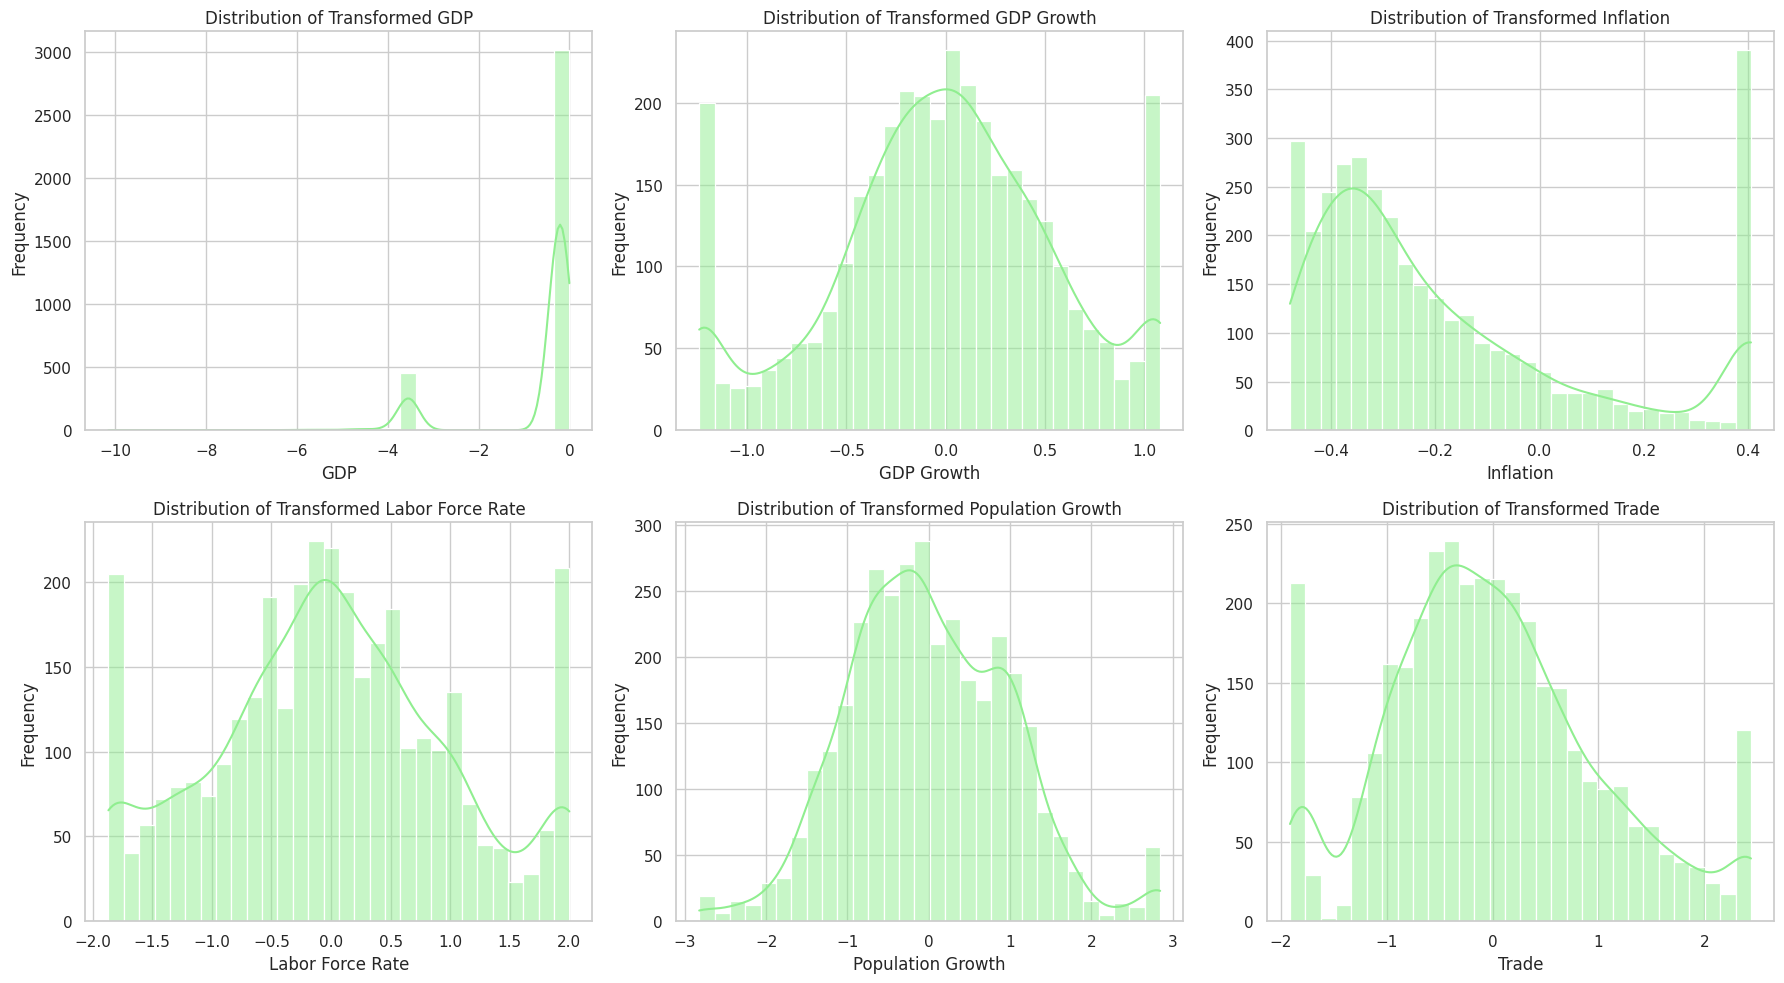

In [136]:
# Visualizing the transformed features to check distributions
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Plot histograms for transformed features
input_features_transformed = ['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']

for i, feature in enumerate(input_features_transformed):
    sns.histplot(df_capped[feature], ax=axes[i//3, i%3], kde=True, bins=30, color='lightgreen')
    axes[i//3, i%3].set_title(f'Distribution of Transformed {feature}')
    axes[i//3, i%3].set_xlabel(feature)
    axes[i//3, i%3].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


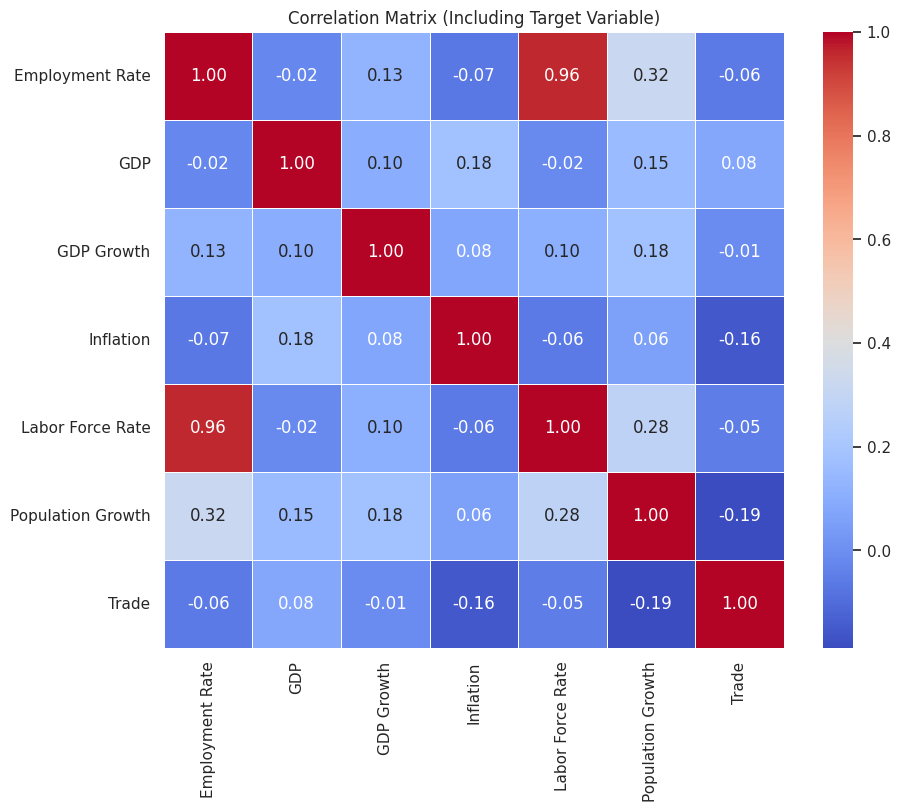

In [137]:
# Calculate correlation matrix including the target variable
correlation_matrix = df_capped[['Employment Rate', 'GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']].corr()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix (Including Target Variable)')
plt.show()




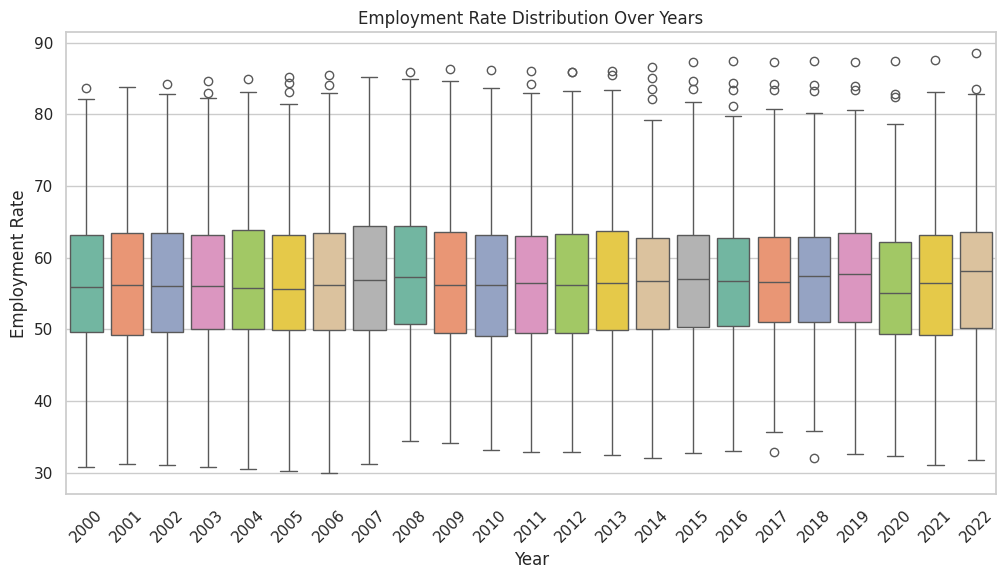

In [138]:
# Boxplot for employment rate over years
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Employment Rate', data=df_capped, palette="Set2")
plt.title('Employment Rate Distribution Over Years')
plt.xlabel('Year')
plt.ylabel('Employment Rate')
plt.xticks(rotation=45)
plt.show()


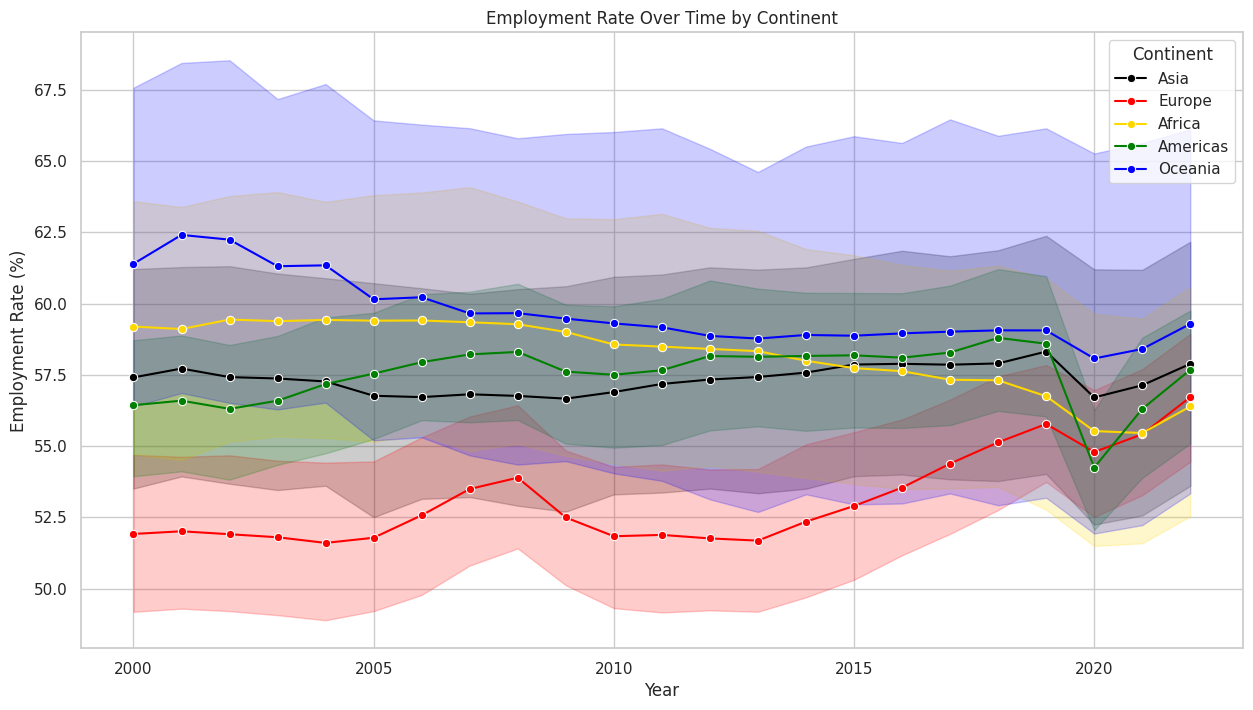

In [139]:
# Group by Continent and Year, and calculate the mean of selected features
continent_time_series = df_capped.groupby(['Continent', 'Year']).agg({
    'Employment Rate': 'mean',
    'GDP': 'mean',
    'Inflation': 'mean',
    'Labor Force Rate': 'mean',
    'Population Growth': 'mean',
    'Trade': 'mean'
}).reset_index()

# Plot time series for each continent
continents = continent_time_series['Continent'].unique()


# Plot using seaborn's lineplot with hue to distinguish continents
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_renamed, x='Year', y='Employment Rate', hue='Continent', marker='o', palette=['black', 'red', 'gold', 'green', 'blue'])
plt.title('Employment Rate Over Time by Continent')
plt.xlabel('Year')
plt.ylabel('Employment Rate (%)')
plt.legend(title='Continent')
plt.grid(True)
plt.show()



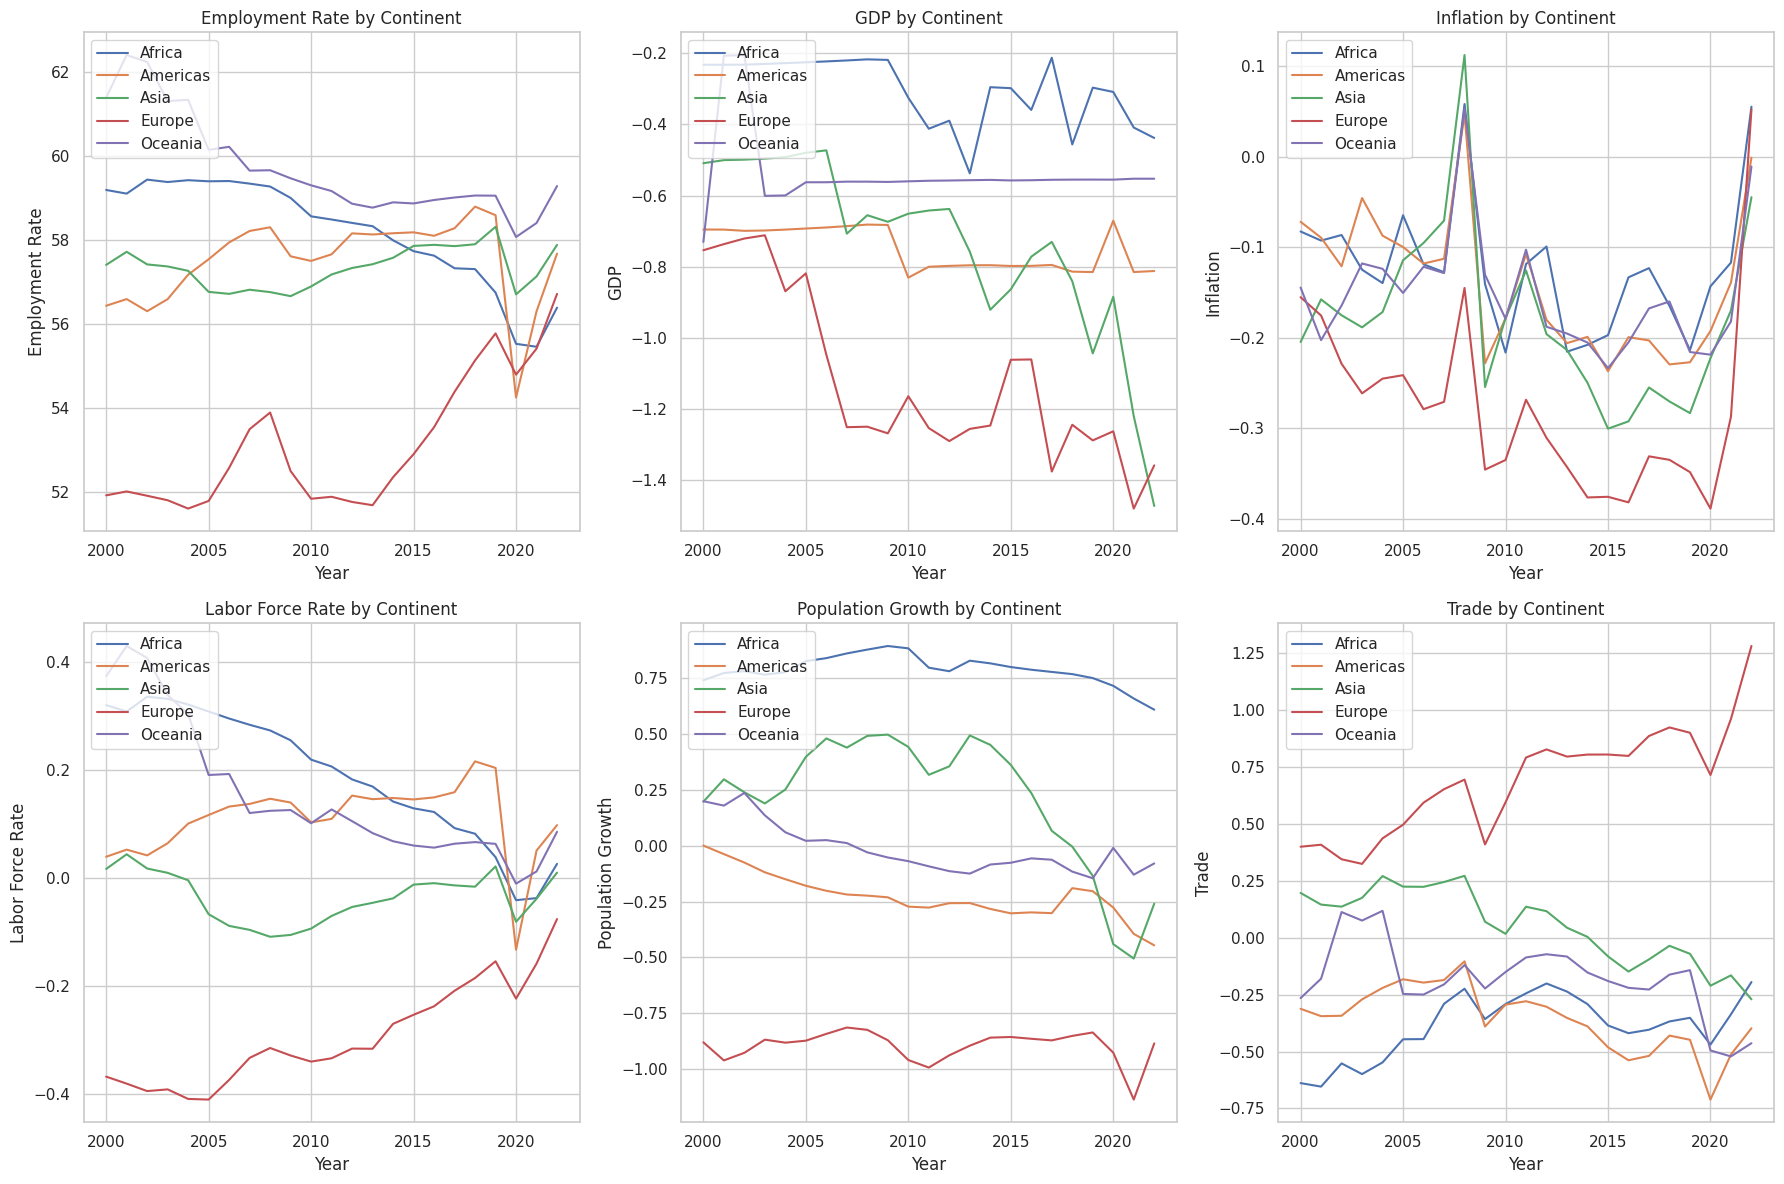

In [140]:
# Create subplots for different features
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Features to plot
features = ['Employment Rate', 'GDP', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']

# Loop through features and plot for each continent
for i, feature in enumerate(features):
    ax = axes[i//3, i%3]

    for continent in continents:
        continent_data = continent_time_series[continent_time_series['Continent'] == continent]
        ax.plot(continent_data['Year'], continent_data[feature], label=f'{continent}')

    ax.set_title(f'{feature} by Continent')
    ax.set_xlabel('Year')
    ax.set_ylabel(feature)
    ax.legend(loc='upper left')
    ax.grid(True)

plt.tight_layout()
plt.show()


In [141]:
# Split data into training and testing based on the year
train_df = df_renamed[df_renamed['Year'] <= 2020]
test_df = df_renamed[df_renamed['Year'] > 2020]

# Separate the features (X) and target variable (y)
X_train = train_df[['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']]
y_train = train_df['Employment Rate']

X_test = test_df[['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']]
y_test = test_df['Employment Rate']

# Check the shape of the datasets
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (3214, 6)
Testing data shape: (301, 6)


In [142]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Verify the transformation
print("Scaled Training Data:\n", X_train_scaled[:5])
print("Scaled Testing Data:\n", X_test_scaled[:5])


Scaled Training Data:
 [[-0.24067767  1.39292029  0.18211442 -1.44326444  1.34469894 -1.45191028]
 [-0.24018498  0.33108941 -0.12007395 -1.44899313  1.69664141 -1.44108637]
 [-0.2384052   1.86243813 -0.02299276 -1.45390344  0.23025166 -1.48618486]
 [-0.2381735   0.07207946  0.88526601 -1.45789307  0.3609482  -1.48216532]
 [-0.23669457  3.23019772 -0.81622917 -1.46085971  1.33518772 -1.4522028 ]]
Scaled Testing Data:
 [[-0.23550831 -4.38763092  1.64432917 -2.03618424  0.89152994 -0.53253583]
 [-0.23535723 -1.76598314  1.45984167 -2.4047643   0.69351469 -0.11981848]
 [-0.23315928  0.97320345 -0.36294024 -0.24729732 -1.46963203 -0.05961279]
 [-0.23252727  0.24049835 -0.12311515 -0.08474564 -1.65015728  0.11589497]
 [-0.12523968  0.04947989 -0.09746917 -2.17735562  0.14557816 -0.61212068]]


In [143]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = linear_model.predict(X_test_scaled)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression Model Performance:\nMAE: {mae}\nMSE: {mse}\nR^2: {r2}")


Linear Regression Model Performance:
MAE: 2.089180684153083
MSE: 7.9727006385141115
R^2: 0.9314302442018243


In [144]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Reshape data into 3D array for LSTM: (samples, timesteps, features)
def reshape_for_lstm(X):
    return X.reshape((X.shape[0], 1, X.shape[1]))

# Scale the features for LSTM (scaling between 0 and 1)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_lstm = reshape_for_lstm(X_train_scaled)
X_test_lstm = reshape_for_lstm(X_test_scaled)

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_lstm, y_train, epochs=20, batch_size=32, verbose=1)

# Predict with the model
y_pred_lstm = model.predict(X_test_lstm)

# Evaluate performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
mse_lstm = mean_squared_error(y_test, y_pred_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)

print(f"LSTM Model Performance:")
print(f"MAE: {mae_lstm}")
print(f"MSE: {mse_lstm}")
print(f"R^2: {r2_lstm}")


Epoch 1/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 3278.5718
Epoch 2/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3113.6677
Epoch 3/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2630.7961
Epoch 4/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1980.4562
Epoch 5/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1439.3237
Epoch 6/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1025.1066
Epoch 7/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 761.0737
Epoch 8/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 547.2123
Epoch 9/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 395.3881
Epoch 10/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 284.7790
Epoch 11/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 221.5476
Epoch 12/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 175.6940
Epoch 13/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 144.4970
Epoch 14/20
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 125.4728
Epoch 15/20
101/101 ━━━

In [145]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train XGBoost model
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1,
                          max_depth=5, alpha=10, n_estimators=10)

xg_reg.fit(X_train_scaled, y_train)

# Predict with the model
y_pred_xgb = xg_reg.predict(X_test_scaled)

# Evaluate performance
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Model Performance:")
print(f"MAE: {mae_xgb}")
print(f"MSE: {mse_xgb}")
print(f"R^2: {r2_xgb}")


XGBoost Model Performance:
MAE: 6.694024180364767
MSE: 76.1079100227167
R^2: 0.3454287272048093


In [146]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_scaled, y_train)

# Predict with the model
y_pred_rf = rf_reg.predict(X_test_scaled)

# Evaluate performance
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Model Performance:")
print(f"MAE: {mae_rf}")
print(f"MSE: {mse_rf}")
print(f"R^2: {r2_rf}")


Random Forest Model Performance:
MAE: 1.7110100996677735
MSE: 5.9491752432677725
R^2: 0.9488337124235169


In [147]:
from sklearn.ensemble import RandomForestRegressor

# Define features and target for Random Forest model
features = df_renamed[['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']]
target = df_renamed['Employment Rate']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Now filter the data for 2021 and 2022
actual_2021_2022 = df_renamed[(df_renamed['Year'] == 2021) | (df_renamed['Year'] == 2022)]

# Extract features for the prediction
features_for_prediction = actual_2021_2022[['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']]

# Apply scaling to the features (same scaler as before, assuming you have `scaler` defined)
scaled_features = scaler.transform(features_for_prediction)

# Predict using the Random Forest model
predictions_2021_2022 = rf_model.predict(scaled_features)

# Add predictions to the actual data for comparison
actual_2021_2022['Predicted Employment Rate'] = predictions_2021_2022

# Display the comparison
print(actual_2021_2022[['Country Name', 'Year', 'Employment Rate', 'Predicted Employment Rate']])


                  Country Name  Year  Employment Rate  \
21                 Afghanistan  2021           36.263   
22                 Afghanistan  2022           32.333   
45                     Albania  2021           51.336   
46                     Albania  2022           53.304   
69                     Algeria  2021           34.390   
70                     Algeria  2022           36.593   
141                     Angola  2021           64.304   
142                     Angola  2022           64.447   
189                  Argentina  2021           55.085   
190                  Argentina  2022           56.351   
213                    Armenia  2021           56.445   
214                    Armenia  2022           56.548   
261                  Australia  2021           62.478   
262                  Australia  2022           63.699   
285                    Austria  2021           57.200   
286                    Austria  2022           58.441   
309                 Azerbaijan 

In [148]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter grid with a smaller range
param_dist = {
    'n_estimators': [100, 150, 200],  # Number of trees in the forest
    'max_depth': [10, 20, None],  # Max depth of the tree
    'min_samples_split': [2, 5, 10],  # Min samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Min samples required to be at a leaf node
    'max_features': ['auto', 'sqrt']  # Number of features to consider
}

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Initialize RandomizedSearchCV with fewer iterations
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist,
                                   n_iter=10, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', random_state=42)

# Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_

# Print the best hyperparameters found
print(f"Best Hyperparameters: {best_params}")

# Train the model with the best hyperparameters
best_rf_model = random_search.best_estimator_

# Predict on the test set
predictions = best_rf_model.predict(X_test)

# Evaluate the model performance
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")


Best Hyperparameters: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20}
MAE: 1.378892657251771
MSE: 3.646580353987508
R^2: 0.9714501217286209


In [149]:
# Filter data for 2000 to 2020 for training
train_data = df_renamed[(df_renamed['Year'] >= 2000) & (df_renamed['Year'] <= 2020)]

# Filter data for 2021 and 2022 for testing
test_data_2021_2022 = df_renamed[(df_renamed['Year'] == 2021) | (df_renamed['Year'] == 2022)]

# Separate features and target for training
X_train = train_data[['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']]
y_train = train_data['Employment Rate']

# Separate features for testing
X_test_2021_2022 = test_data_2021_2022[['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']]

# Initialize the Random Forest model (or your tuned model)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the data from 2000 to 2020
rf_model.fit(X_train, y_train)

# Predict for 2021 and 2022
predictions_2021_2022 = rf_model.predict(X_test_2021_2022)

# Add predictions to the actual data for comparison
test_data_2021_2022['Predicted Employment Rate'] = predictions_2021_2022

# Display the comparison
print(test_data_2021_2022[['Country Name', 'Year', 'Employment Rate', 'Predicted Employment Rate']])

# Evaluate model performance (for 2021 and 2022 only)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(test_data_2021_2022['Employment Rate'], predictions_2021_2022)
mse = mean_squared_error(test_data_2021_2022['Employment Rate'], predictions_2021_2022)
r2 = r2_score(test_data_2021_2022['Employment Rate'], predictions_2021_2022)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")


                  Country Name  Year  Employment Rate  \
21                 Afghanistan  2021           36.263   
22                 Afghanistan  2022           32.333   
45                     Albania  2021           51.336   
46                     Albania  2022           53.304   
69                     Algeria  2021           34.390   
70                     Algeria  2022           36.593   
141                     Angola  2021           64.304   
142                     Angola  2022           64.447   
189                  Argentina  2021           55.085   
190                  Argentina  2022           56.351   
213                    Armenia  2021           56.445   
214                    Armenia  2022           56.548   
261                  Australia  2021           62.478   
262                  Australia  2022           63.699   
285                    Austria  2021           57.200   
286                    Austria  2022           58.441   
309                 Azerbaijan 

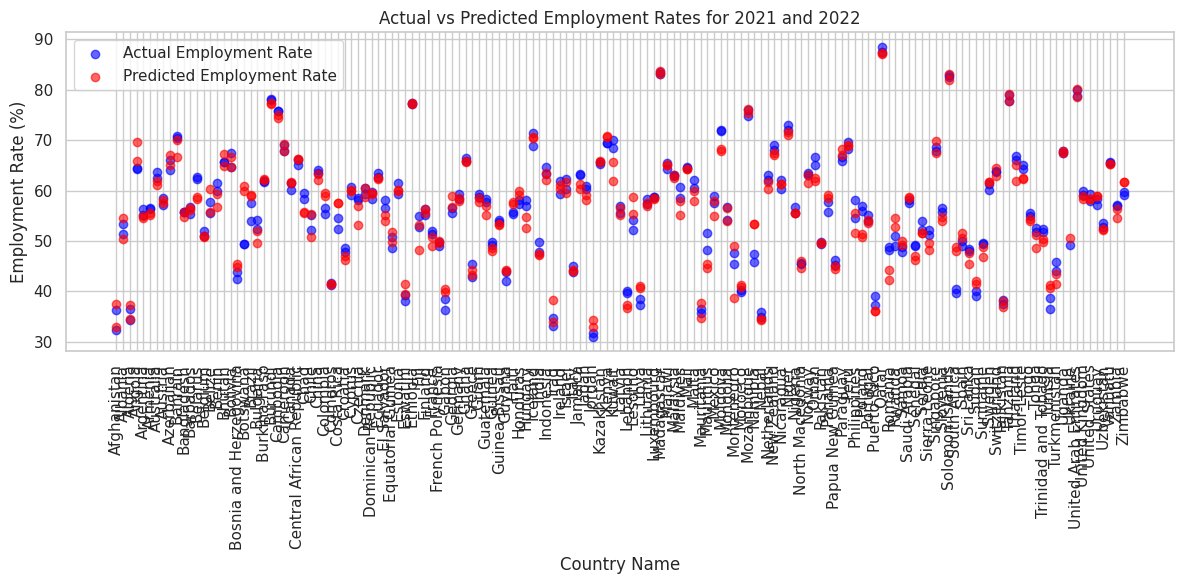

In [150]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Plotting the Actual vs Predicted Employment Rates
plt.figure(figsize=(12, 6))

# Plot actual values
plt.scatter(test_data_2021_2022['Country Name'], test_data_2021_2022['Employment Rate'], color='blue', label='Actual Employment Rate', alpha=0.6)

# Plot predicted values
plt.scatter(test_data_2021_2022['Country Name'], test_data_2021_2022['Predicted Employment Rate'], color='red', label='Predicted Employment Rate', alpha=0.6)

# Rotate the country names on the x-axis for better readability
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Country Name')
plt.ylabel('Employment Rate (%)')
plt.title('Actual vs Predicted Employment Rates for 2021 and 2022')

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


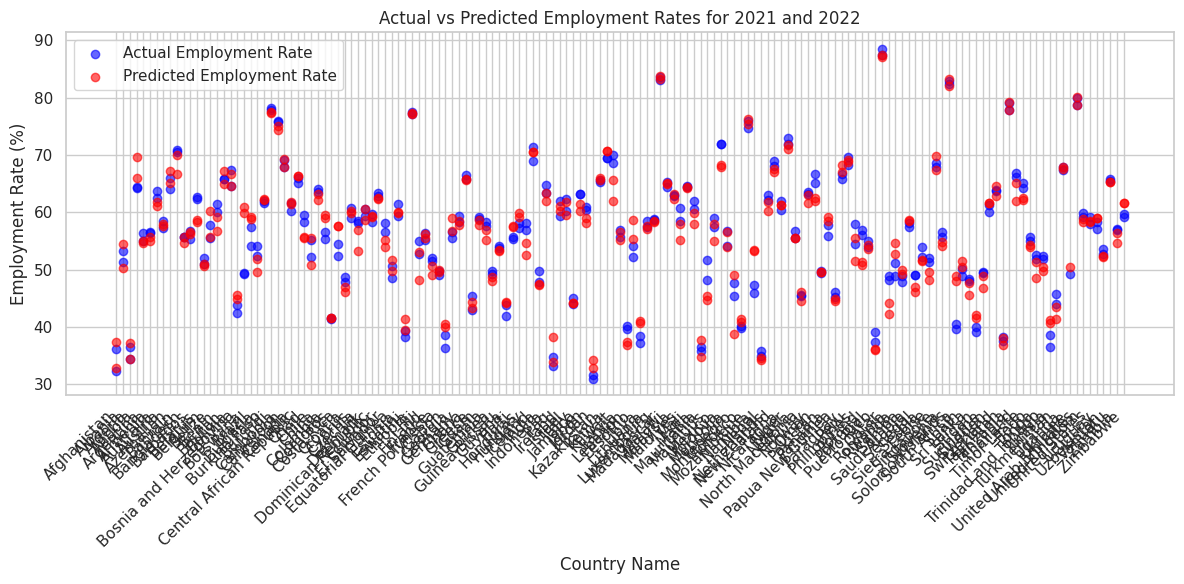

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plot style
sns.set(style="whitegrid")

# Plotting the Actual vs Predicted Employment Rates
plt.figure(figsize=(12, 6))

# Plot actual values
plt.scatter(test_data_2021_2022['Country Name'], test_data_2021_2022['Employment Rate'], color='blue', label='Actual Employment Rate', alpha=0.6)

# Plot predicted values
plt.scatter(test_data_2021_2022['Country Name'], test_data_2021_2022['Predicted Employment Rate'], color='red', label='Predicted Employment Rate', alpha=0.6)

# Rotate the country names on the x-axis for better readability (greater angle)
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel('Country Name')
plt.ylabel('Employment Rate (%)')
plt.title('Actual vs Predicted Employment Rates for 2021 and 2022')

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()


In [152]:
import plotly.express as px

# Create a DataFrame for Plotly
results_2021_2022 = test_data_2021_2022[['Country Name', 'Year', 'Employment Rate', 'Predicted Employment Rate']]

# Create an interactive scatter plot
fig = px.scatter(results_2021_2022, x='Country Name', y='Employment Rate', color='Year',
                 hover_data=['Predicted Employment Rate'],
                 labels={'Employment Rate': 'Actual Employment Rate'},
                 title="Actual vs Predicted Employment Rates for 2021 and 2022")

# Rotate x-axis labels and improve layout
fig.update_layout(
    xaxis_tickangle=-45,
    xaxis_title='Country Name',
    yaxis_title='Employment Rate (%)',
    autosize=True
)

fig.show()


In [153]:
import plotly.express as px

# Create a DataFrame for Plotly
results_2021_2022 = test_data_2021_2022[['Country Name', 'Year', 'Employment Rate', 'Predicted Employment Rate']]

# Create an interactive scatter plot
fig = px.scatter(results_2021_2022,
                 x='Country Name',
                 y='Employment Rate',
                 color='Year',
                 hover_data=['Country Name', 'Predicted Employment Rate'],
                 labels={'Employment Rate': 'Actual Employment Rate'},
                 title="Actual vs Predicted Employment Rates for 2021 and 2022")

# Hide x-axis labels and ticks
fig.update_layout(
    xaxis=dict(
        showticklabels=False,  # Hide x-axis labels
    ),
    xaxis_title='All Country ',  # Remove the title for the x-axis
    yaxis_title='Employment Rate (%)',  # Title for y-axis
    autosize=True
)

fig.show()


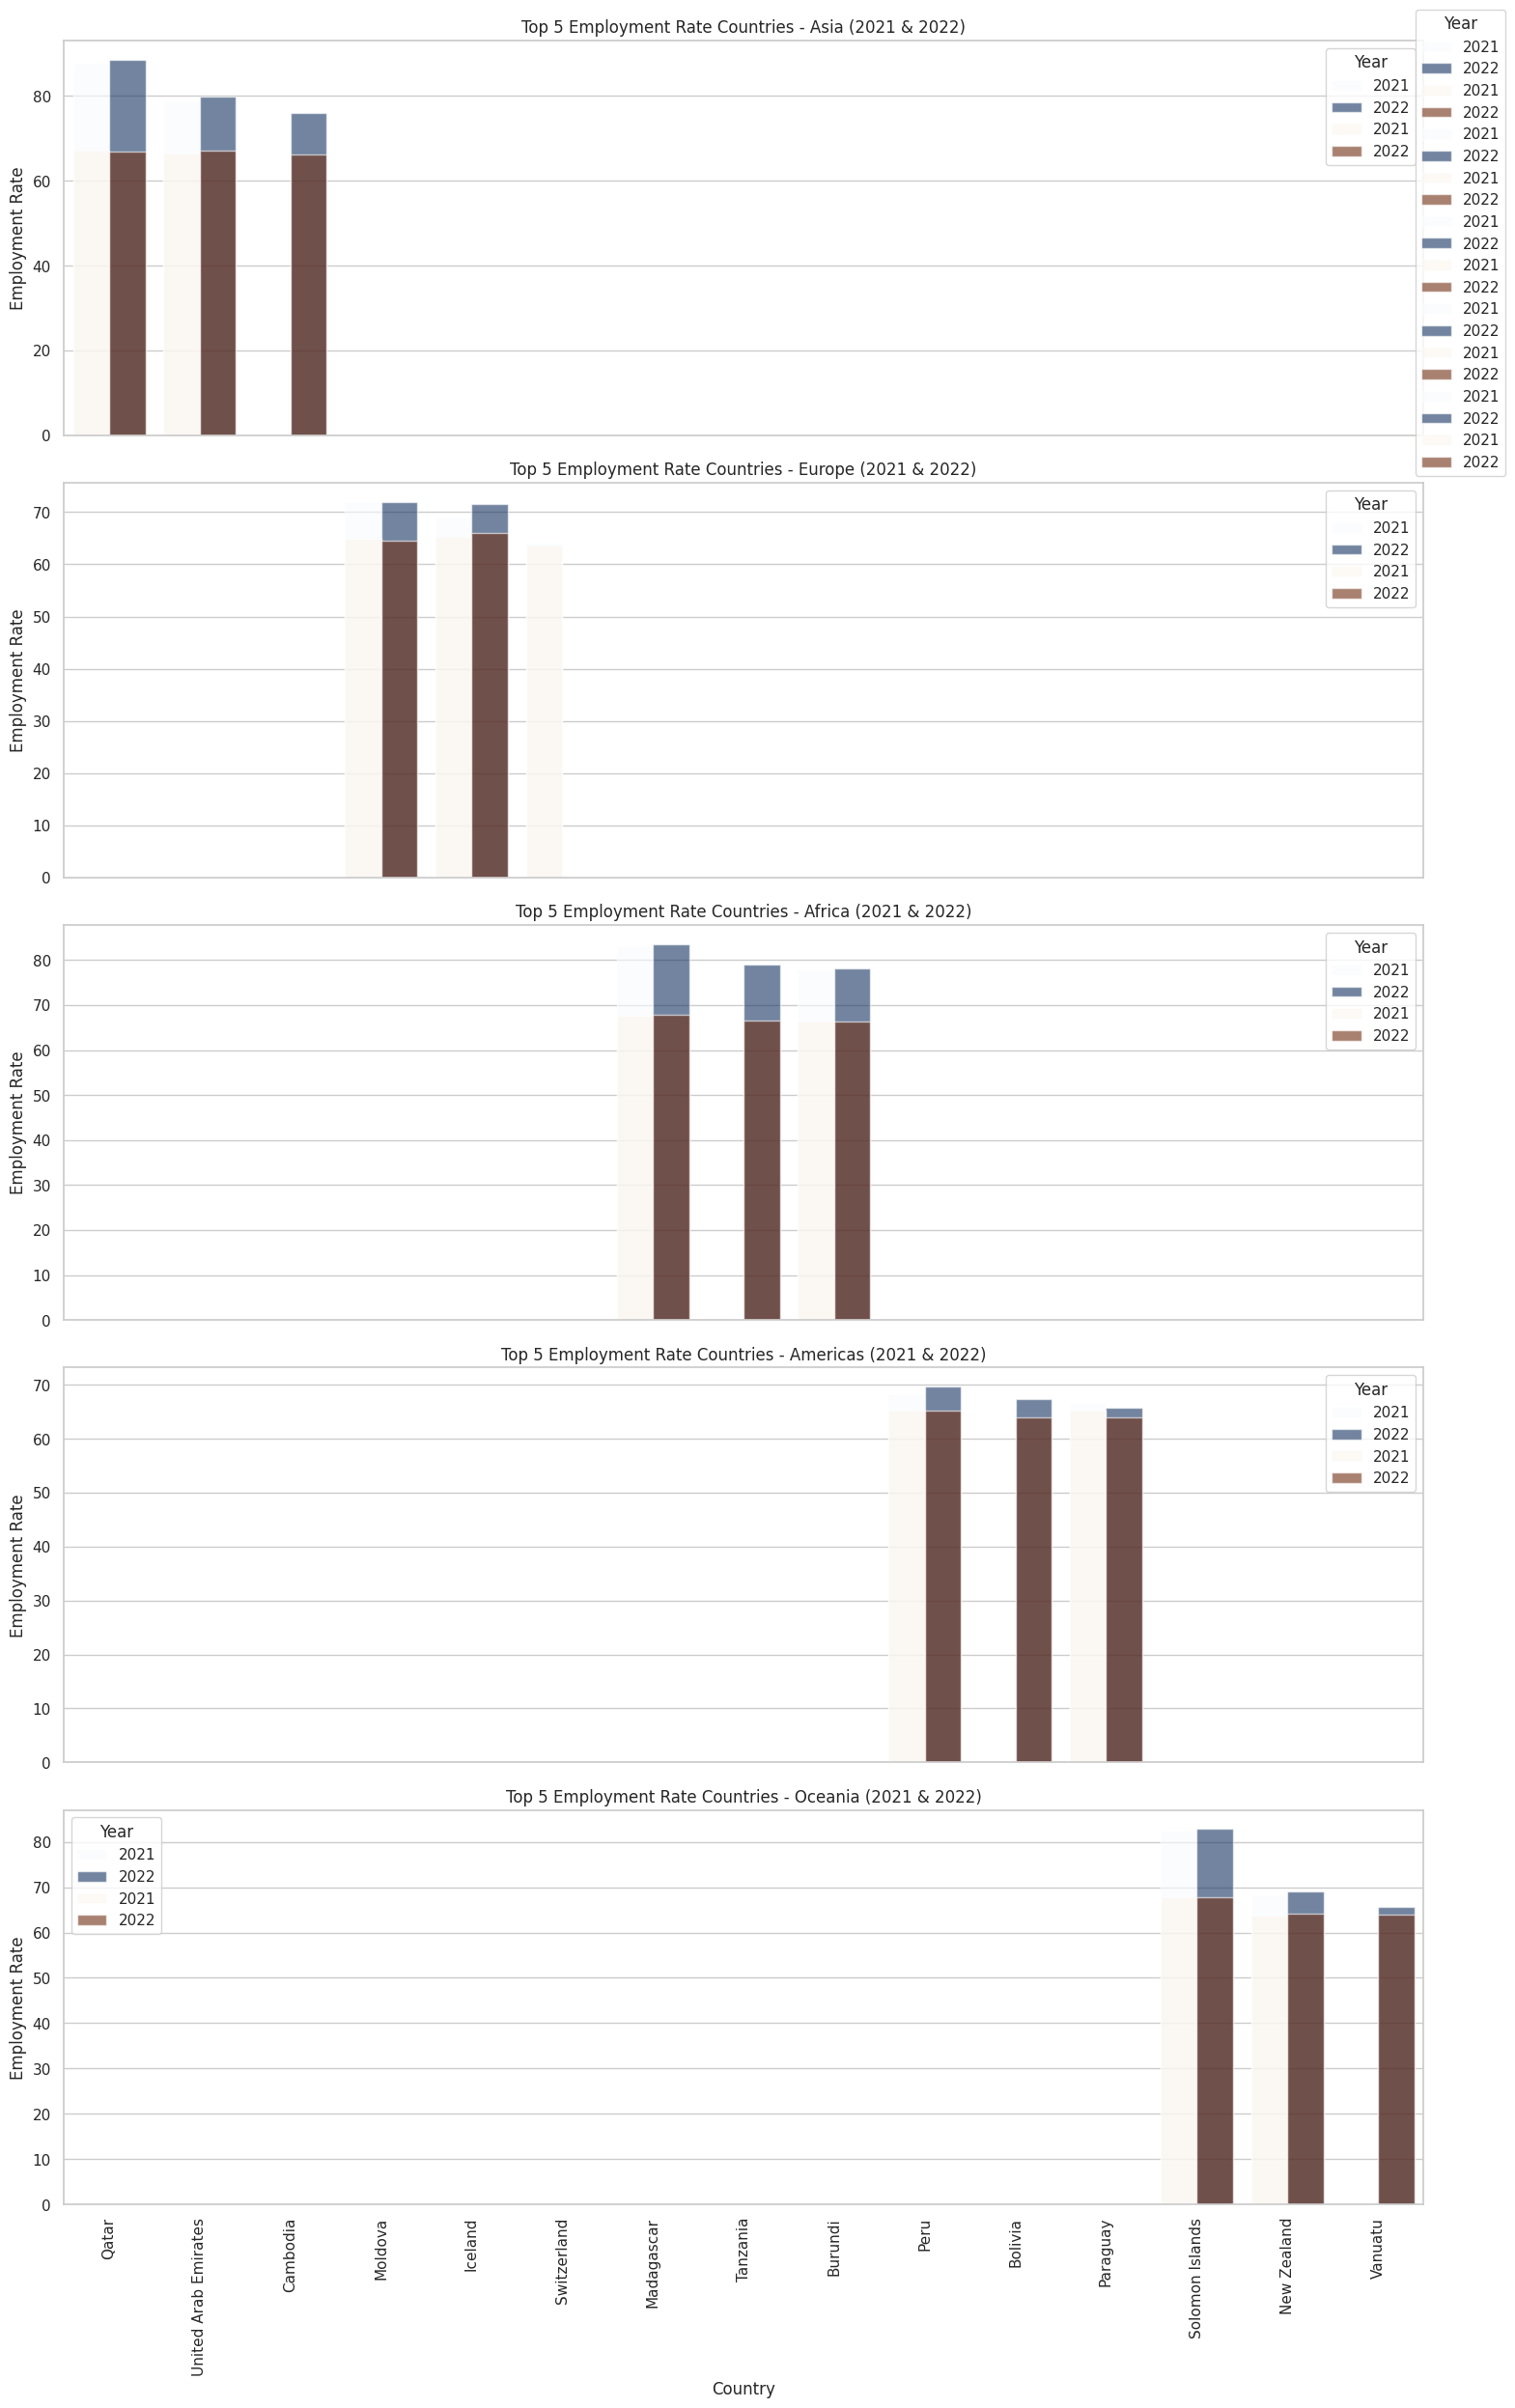

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df_renamed' has columns for Continent, Country Name, Year, Employment Rate, and Predicted Employment Rate

# Initialize an empty list to store top 5 countries from each continent for 2021 and 2022
top_5_by_continent_2021_2022 = []

# Group by continent and select top 5 countries based on Employment Rate for 2021 and 2022
for continent in df_renamed['Continent'].unique():
    # Filter data for 2021 and 2022
    continent_data = df_renamed[(df_renamed['Continent'] == continent) &
                                 (df_renamed['Year'].isin([2021, 2022]))]
    # Sort by Employment Rate and select the top 5 countries
    top_countries = continent_data.nlargest(5, 'Employment Rate')
    top_5_by_continent_2021_2022.append(top_countries)

# Combine the top countries from each continent into one DataFrame
top_5_by_continent_2021_2022_df = pd.concat(top_5_by_continent_2021_2022)

# Ensure the 'Predicted Employment Rate' column exists in the DataFrame
# If predictions were not added before, we can add them like so:
if 'Predicted Employment Rate' not in top_5_by_continent_2021_2022_df.columns:
    # Extract features for prediction and apply the trained RandomForest model
    features_for_prediction = top_5_by_continent_2021_2022_df[['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']]
    scaled_features = scaler.transform(features_for_prediction)  # Assuming `scaler` is defined
    predictions = rf_model.predict(scaled_features)
    top_5_by_continent_2021_2022_df['Predicted Employment Rate'] = predictions

# Create a figure with 5 subplots (one for each continent)
fig, axes = plt.subplots(5, 1, figsize=(15, 25), sharex=True)

# List of continents for which we will plot
continents = df_renamed['Continent'].unique()

# Plot data for each continent
for i, continent in enumerate(continents):
    continent_data = top_5_by_continent_2021_2022_df[top_5_by_continent_2021_2022_df['Continent'] == continent]

    # Check if both 'Employment Rate' and 'Predicted Employment Rate' columns are available
    if 'Employment Rate' in continent_data.columns and 'Predicted Employment Rate' in continent_data.columns:
        # Plotting the actual vs predicted employment rates for the current continent
        sns.barplot(data=continent_data, x='Country Name', y='Employment Rate', hue='Year',
                    palette='Blues', alpha=0.6, ax=axes[i])

        sns.barplot(data=continent_data, x='Country Name', y='Predicted Employment Rate', hue='Year',
                    palette='Oranges', alpha=0.6, ax=axes[i])

        # Rotate the x-axis labels to avoid overlap
        axes[i].tick_params(axis='x', rotation=90)

        # Set title and labels for the subplot
        axes[i].set_title(f'Top 5 Employment Rate Countries - {continent} (2021 & 2022)')
        axes[i].set_ylabel('Employment Rate')
        axes[i].set_xlabel('Country')
    else:
        print(f"Columns missing for {continent}. Skipping plot.")

# Add a legend and adjust the layout
fig.legend(title='Year', loc='upper right', bbox_to_anchor=(1.05, 1), bbox_transform=fig.transFigure)
fig.tight_layout()

# Show the plot
plt.show()


In [155]:
from tabulate import tabulate

# Extract relevant columns for the comparison table
comparison_data = test_data_2021_2022[['Country Name', 'Year', 'Employment Rate', 'Predicted Employment Rate']]

# Convert the DataFrame to a tabular format using tabulate
table = tabulate(comparison_data, headers='keys', tablefmt='pretty', showindex=False)

# Print the table
print(table)

# Print the evaluation metrics
print("\nModel Evaluation Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R^2: {r2:.2f}")


+--------------------------+------+-----------------+---------------------------+
|       Country Name       | Year | Employment Rate | Predicted Employment Rate |
+--------------------------+------+-----------------+---------------------------+
|       Afghanistan        | 2021 |     36.263      |     37.44285999999995     |
|       Afghanistan        | 2022 |     32.333      |    32.918920000000014     |
|         Albania          | 2021 |     51.336      |     50.34927999999999     |
|         Albania          | 2022 |     53.304      |    54.561340000000015     |
|         Algeria          | 2021 |      34.39      |    34.517010000000035     |
|         Algeria          | 2022 |     36.593      |     37.23869999999998     |
|          Angola          | 2021 |     64.304      |     65.95795999999999     |
|          Angola          | 2022 |     64.447      |     69.61677999999996     |
|        Argentina         | 2021 |     55.085      |     55.01389000000002     |
|        Argenti

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor  # Or use your model
from sklearn.metrics import mean_squared_error

# Load your data (assuming df is already your dataset)
df_renamed = df[['Year', 'Employment Rate', 'GDP', 'GDP Growth', 'Inflation',
                 'Labor Force Participation Rate', 'Population Growth', 'Trade', 'Continent']]

# Prepare data
X = df_renamed[['Year', 'GDP', 'GDP Growth', 'Inflation', 'Labor Force Participation Rate',
                'Population Growth', 'Trade']]
y = df_renamed['Employment Rate']

# Split the data into training (2000–2020) and test (2021–2022)
train_data = df_renamed[df_renamed['Year'] <= 2020]
test_data_2021_2022 = df_renamed[df_renamed['Year'].isin([2021, 2022])]

X_train = train_data[['Year', 'GDP', 'GDP Growth', 'Inflation', 'Labor Force Participation Rate',
                      'Population Growth', 'Trade']]
y_train = train_data['Employment Rate']

X_test_2021_2022 = test_data_2021_2022[['Year', 'GDP', 'GDP Growth', 'Inflation', 'Labor Force Participation Rate',
                                         'Population Growth', 'Trade']]
y_test_2021_2022 = test_data_2021_2022['Employment Rate']

# Initialize and train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict for 2021 and 2022
y_pred_2021_2022 = rf_model.predict(X_test_2021_2022)

# Evaluate performance
mse_2021_2022 = mean_squared_error(y_test_2021_2022, y_pred_2021_2022)
print(f"Mean Squared Error for 2021-2022: {mse_2021_2022}")

# Predict for 2023 to 2025 using the trained model
future_years = pd.DataFrame({
    'Year': [2023, 2024, 2025],
    'GDP': [None, None, None],  # Placeholder values
    'GDP Growth': [None, None, None],  # Placeholder values
    'Inflation': [None, None, None],  # Placeholder values
    'Labor Force Participation Rate': [None, None, None],  # Placeholder values
    'Population Growth': [None, None, None],  # Placeholder values
    'Trade': [None, None, None]  # Placeholder values
})

# Use the same model to predict for 2023-2025 (assuming the model has learned the trend from the Year feature)
future_predictions = rf_model.predict(future_years[['Year', 'GDP', 'GDP Growth', 'Inflation',
                                                   'Labor Force Participation Rate', 'Population Growth', 'Trade']])

# Display future predictions
print(f"Predicted Employment Rates for 2023-2025: {future_predictions}")

# Combine the results with the original data for visualization
future_data = pd.DataFrame({
    'Year': [2023, 2024, 2025],
    'Employment Rate': future_predictions
})

# Combine with historical data (2000–2022)
df_extended = pd.concat([df_renamed[['Year', 'Employment Rate']], future_data], ignore_index=True)

# Visualize the results with a line plot
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_extended, x='Year', y='Employment Rate', marker='o')
plt.title('Employment Rate Over Time (2000-2025)')
plt.xlabel('Year')
plt.ylabel('Employment Rate (%)')
plt.grid(True)
plt.show()


KeyError: "['Employment Rate', 'GDP', 'GDP Growth', 'Inflation', 'Labor Force Participation Rate', 'Population Growth', 'Trade'] not in index"

In [157]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Define the parameter grid with a smaller range
param_dist = {
    'n_estimators': [100, 150, 200],  # Number of trees in the forest
    'max_depth': [10, 20, None],  # Max depth of the tree
    'min_samples_split': [2, 5, 10],  # Min samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Min samples required to be at a leaf node
    'max_features': ['auto', 'sqrt']  # Number of features to consider
}

# Assuming 'df_renamed' is your full dataset

# 1. Filter data for 2000 to 2020 for training
train_data = df_renamed[(df_renamed['Year'] >= 2000) & (df_renamed['Year'] <= 2020)]

# 2. Filter data for 2021 and 2022 for testing
test_data_2021_2022 = df_renamed[(df_renamed['Year'] == 2021) | (df_renamed['Year'] == 2022)]

# 3. Separate features and target for training
X_train = train_data[['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']]
y_train = train_data['Employment Rate']

# 4. Separate features for testing
X_test_2021_2022 = test_data_2021_2022[['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']]

# 5. Initialize Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# 6. Initialize RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist,
                                   n_iter=10, cv=3, n_jobs=-1, scoring='neg_mean_squared_error', random_state=42)

# 7. Fit RandomizedSearchCV to the training data
random_search.fit(X_train, y_train)

# 8. Get the best hyperparameters from the search
best_params = random_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# 9. Train the model with the best hyperparameters
best_rf_model = random_search.best_estimator_

# 10. Predict on the test set for 2021 and 2022
predictions_2021_2022 = best_rf_model.predict(X_test_2021_2022)

# 11. Add predictions to the actual data for comparison
test_data_2021_2022['Predicted Employment Rate'] = predictions_2021_2022

# 12. Display the comparison between actual and predicted employment rates for 2021 and 2022
print(test_data_2021_2022[['Country Name', 'Year', 'Employment Rate', 'Predicted Employment Rate']])

# 13. Evaluate the model performance on the 2021 and 2022 test data
mae = mean_absolute_error(test_data_2021_2022['Employment Rate'], predictions_2021_2022)
mse = mean_squared_error(test_data_2021_2022['Employment Rate'], predictions_2021_2022)
r2 = r2_score(test_data_2021_2022['Employment Rate'], predictions_2021_2022)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")

# Now, for Sequential Prediction for 2023, 2024, 2025:

# 14. Extract the most recent data (2022) for each country
predictions_all_countries = []
for country in df_renamed['Country Name'].unique():
    country_data = df_renamed[df_renamed['Country Name'] == country]

    # Get the most recent data for 2022
    latest_data = country_data[country_data['Year'] == 2022].drop(columns=['Employment Rate', 'Year'])

    # 15. Sequentially predict for 2023, 2024, and 2025
    pred_2023 = best_rf_model.predict([latest_data.iloc[0]])
    latest_data['Employment Rate'] = pred_2023  # Add predicted 2023 to features for 2024 prediction
    pred_2024 = best_rf_model.predict([latest_data.iloc[0]])
    latest_data['Employment Rate'] = pred_2024  # Add predicted 2024 to features for 2025 prediction
    pred_2025 = best_rf_model.predict([latest_data.iloc[0]])

    # 16. Store predictions in a dictionary for all countries
    predictions_all_countries.append({
        'Country Name': country,
        'Predicted Employment Rate 2023': pred_2023[0],
        'Predicted Employment Rate 2024': pred_2024[0],
        'Predicted Employment Rate 2025': pred_2025[0]
    })

# 17. Convert the predictions into a DataFrame for easier visualization
predictions_df = pd.DataFrame(predictions_all_countries)

# 18. Display the predictions for all countries
print(predictions_df)


Best Hyperparameters: {'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20}
                  Country Name  Year  Employment Rate  \
21                 Afghanistan  2021           36.263   
22                 Afghanistan  2022           32.333   
45                     Albania  2021           51.336   
46                     Albania  2022           53.304   
69                     Algeria  2021           34.390   
70                     Algeria  2022           36.593   
141                     Angola  2021           64.304   
142                     Angola  2022           64.447   
189                  Argentina  2021           55.085   
190                  Argentina  2022           56.351   
213                    Armenia  2021           56.445   
214                    Armenia  2022           56.548   
261                  Australia  2021           62.478   
262                  Australia  2022           63.699   
285          

ValueError: could not convert string to float: 'Afghanistan'

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np

# Assuming 'df_renamed' is your full dataset

# 1. Filter data for 2000 to 2020 for training
train_data = df_renamed[(df_renamed['Year'] >= 2000) & (df_renamed['Year'] <= 2020)]

# 2. Filter data for 2021 and 2022 for testing
test_data_2021_2022 = df_renamed[(df_renamed['Year'] == 2021) | (df_renamed['Year'] == 2022)]

# 3. Separate features and target for training
X_train = train_data[['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']]
y_train = train_data['Employment Rate']

# 4. Separate features for testing
X_test_2021_2022 = test_data_2021_2022[['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']]

# 5. Initialize Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# 6. Fit the model
rf_model.fit(X_train, y_train)

# 7. Predict on the test set for 2021 and 2022
predictions_2021_2022 = rf_model.predict(X_test_2021_2022)

# 8. Add predictions to the actual data for comparison
test_data_2021_2022['Predicted Employment Rate'] = predictions_2021_2022

# 9. Display the comparison between actual and predicted employment rates for 2021 and 2022
print(test_data_2021_2022[['Country Name', 'Year', 'Employment Rate', 'Predicted Employment Rate']])

# Now, for Sequential Prediction for 2023, 2024, 2025:

# 10. Extract the most recent data (2022) for each country
predictions_all_countries = []

for country in df_renamed['Country Name'].unique():
    country_data = df_renamed[df_renamed['Country Name'] == country]

    # Get the most recent data for 2022
    latest_data = country_data[country_data['Year'] == 2022]

    # 11. Select only the necessary features for prediction (exclude Employment Rate, Year, Country Name, Continent)
    latest_data = latest_data[['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']]

    # 12. Check if any features are missing
    if latest_data.empty:
        continue  # Skip if no data available for this country

    # Ensure the latest_data is in the correct shape
    latest_data = latest_data.values.reshape(1, -1)  # Reshape to 2D array (1 sample, multiple features)

    # 13. Sequentially predict for 2023, 2024, and 2025
    pred_2023 = rf_model.predict(latest_data)

    # 14. Prepare data for 2024 prediction (no features are updated with predictions, only the original features are used)
    pred_2024 = rf_model.predict(latest_data)

    # 15. Prepare data for 2025 prediction (same as 2024)
    pred_2025 = rf_model.predict(latest_data)

    # 16. Store predictions in a dictionary for all countries
    predictions_all_countries.append({
        'Country Name': country,
        'Predicted Employment Rate 2023': pred_2023[0],
        'Predicted Employment Rate 2024': pred_2024[0],
        'Predicted Employment Rate 2025': pred_2025[0]
    })

# 17. Convert the predictions into a DataFrame for easier visualization
predictions_df = pd.DataFrame(predictions_all_countries)

# 18. Display the predictions for all countries
print(predictions_df)


In [ ]:
predictions_df.head()

In [ ]:
# Store predictions for all countries
predictions_all_countries = []

for country in df_renamed['Country Name'].unique():
    country_data = df_renamed[df_renamed['Country Name'] == country]

    # Get the most recent data for 2022
    latest_data = country_data[country_data['Year'] == 2022]
    if latest_data.empty:
        continue  # Skip if no data available for this country

    # Select features for prediction
    latest_data = latest_data[['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']].values
    if latest_data.shape[0] == 0:
        continue  # Skip if features are empty

    # Initialize predictions dictionary
    country_predictions = {'Country Name': country}

    # Sequential predictions for 2023–2025
    for year in [2023, 2024, 2025]:
        # Predict employment rate
        pred = rf_model.predict(latest_data)[0]
        country_predictions[f'Predicted Employment Rate {year}'] = pred

        # Log intermediate results for debugging
        print(f"Year {year}, Country: {country}, Prediction: {pred}")
        print(f"Before Update: {latest_data}")

        # Dynamically update features for next prediction
        latest_data[0, 0] = pred  # Assume employment rate influences GDP
        latest_data[0, 1] *= np.random.uniform(0.98, 1.02)  # Slight random variation for GDP Growth
        latest_data[0, 2] *= np.random.uniform(0.95, 1.05)  # Slight random variation for Inflation
        latest_data[0, 3] *= np.random.uniform(0.99, 1.01)  # Slight random variation for Labor Force Rate
        latest_data[0, 4] *= np.random.uniform(0.98, 1.02)  # Slight random variation for Population Growth
        latest_data[0, 5] *= np.random.uniform(0.97, 1.03)  # Slight random variation for Trade

        print(f"After Update: {latest_data}\n")

    # Append country predictions
    predictions_all_countries.append(country_predictions)

# Convert predictions to DataFrame
predictions_df = pd.DataFrame(predictions_all_countries)

# Display results
print(predictions_df)
predictions_df.head()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `predictions_df` is the DataFrame with predictions for all countries
# Example DataFrame: predictions_df = pd.DataFrame(predictions_all_countries)

# Set the figure size
plt.figure(figsize=(14, 8))

# Create a line plot showing predicted employment rates for 2023, 2024, and 2025
sns.lineplot(data=predictions_df, x='Country Name', y='Predicted Employment Rate 2023', label='2023', marker='o')
sns.lineplot(data=predictions_df, x='Country Name', y='Predicted Employment Rate 2024', label='2024', marker='o')
sns.lineplot(data=predictions_df, x='Country Name', y='Predicted Employment Rate 2025', label='2025', marker='o')

# Rotate country names for better readability
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Country Name')
plt.ylabel('Predicted Employment Rate')
plt.title('Predicted Employment Rates for 2023-2025 by Country')

# Show the legend
plt.legend(title="Year")

# Show the plot
plt.tight_layout()
plt.show()


In [158]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `df_renamed` contains the historical data (2000-2022) and `predictions_df` contains the predictions (2023-2025)
# We need to merge both the historical and predicted data for each country

# 1. Merge historical and predicted data
historical_data = df_renamed[['Country Name', 'Year', 'Employment Rate']]

# 2. Create a new DataFrame for the predicted values (2023-2025)
predictions_df_long = predictions_df.melt(id_vars='Country Name',
                                           value_vars=['Predicted Employment Rate 2023', 'Predicted Employment Rate 2024', 'Predicted Employment Rate 2025'],
                                           var_name='Year', value_name='Predicted Employment Rate')

# 3. Convert the 'Year' column to numeric for proper plotting
predictions_df_long['Year'] = predictions_df_long['Year'].str.extract('(\d+)').astype(int)

# 4. Concatenate historical and predicted data into one DataFrame
full_data = pd.concat([historical_data, predictions_df_long[['Country Name', 'Year', 'Predicted Employment Rate']].rename(columns={'Predicted Employment Rate': 'Employment Rate'})])

# 5. Set the figure size
plt.figure(figsize=(14, 8))

# 6. Loop through each country and plot its time series
for country in full_data['Country Name'].unique():
    country_data = full_data[full_data['Country Name'] == country]

    # Plot historical data
    sns.lineplot(data=country_data[country_data['Year'] <= 2022],
                 x='Year', y='Employment Rate', label=f'{country} (Historical)', marker='o', color='blue')

    # Plot predicted data for 2023-2025
    sns.lineplot(data=country_data[country_data['Year'] > 2022],
                 x='Year', y='Employment Rate', label=f'{country} (Predicted)', marker='o', color='red')

# 7. Customize the plot for better readability
plt.xlabel('Year')
plt.ylabel('Employment Rate')
plt.title('Employment Rate Time Series (Historical and Predicted)')

# Rotate country names for better visibility
plt.xticks(rotation=45)

# Display the legend
plt.legend(title="Country and Prediction Type")

# Show the plot
plt.tight_layout()
plt.show()


KeyError: "The following id_vars or value_vars are not present in the DataFrame: ['Country Name', 'Predicted Employment Rate 2023', 'Predicted Employment Rate 2024', 'Predicted Employment Rate 2025']"

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df_renamed' contains the historical data (2000-2022) and 'predictions_df' contains the predictions (2023-2025)

# 1. Merge historical and predicted data into one continuous dataset
# Merge historical data (2000–2022)
historical_data = df_renamed[['Country Name', 'Year', 'Employment Rate']]

# Create a new DataFrame for the predicted values (2023-2025)
predictions_df_long = predictions_df.melt(id_vars='Country Name',
                                           value_vars=['Predicted Employment Rate 2023', 'Predicted Employment Rate 2024', 'Predicted Employment Rate 2025'],
                                           var_name='Year', value_name='Employment Rate')

# Extract year from the column names and convert it to integer
predictions_df_long['Year'] = predictions_df_long['Year'].str.extract('(\d+)').astype(int)

# Combine both the historical and predicted data
combined_data = pd.concat([historical_data, predictions_df_long[['Country Name', 'Year', 'Employment Rate']]])

# 2. Set the figure size
plt.figure(figsize=(14, 8))

# 3. Loop through each country and plot its time series
for country in combined_data['Country Name'].unique():
    country_data = combined_data[combined_data['Country Name'] == country]

    # Plot the entire time series (historical + predicted)
    sns.lineplot(data=country_data,
                 x='Year', y='Employment Rate', label=country, marker='o')

# 4. Customize the plot for better readability
plt.xlabel('Year')
plt.ylabel('Employment Rate')
plt.title('Employment Rate Time Series (Historical and Predicted)')

# Rotate year labels for better visibility
plt.xticks(rotation=45)

# Display the legend
plt.legend(title="Country")

# Show the plot
plt.tight_layout()
plt.show()


KeyError: "The following id_vars or value_vars are not present in the DataFrame: ['Country Name', 'Predicted Employment Rate 2023', 'Predicted Employment Rate 2024', 'Predicted Employment Rate 2025']"

RF Mean Squared Error: 2.502141196661027
Predicted Employment Rates for Future Years (2023-2025):
Year: 2023, Employment Rate: 57.43%
Year: 2024, Employment Rate: 54.40%
Year: 2025, Employment Rate: 57.27%


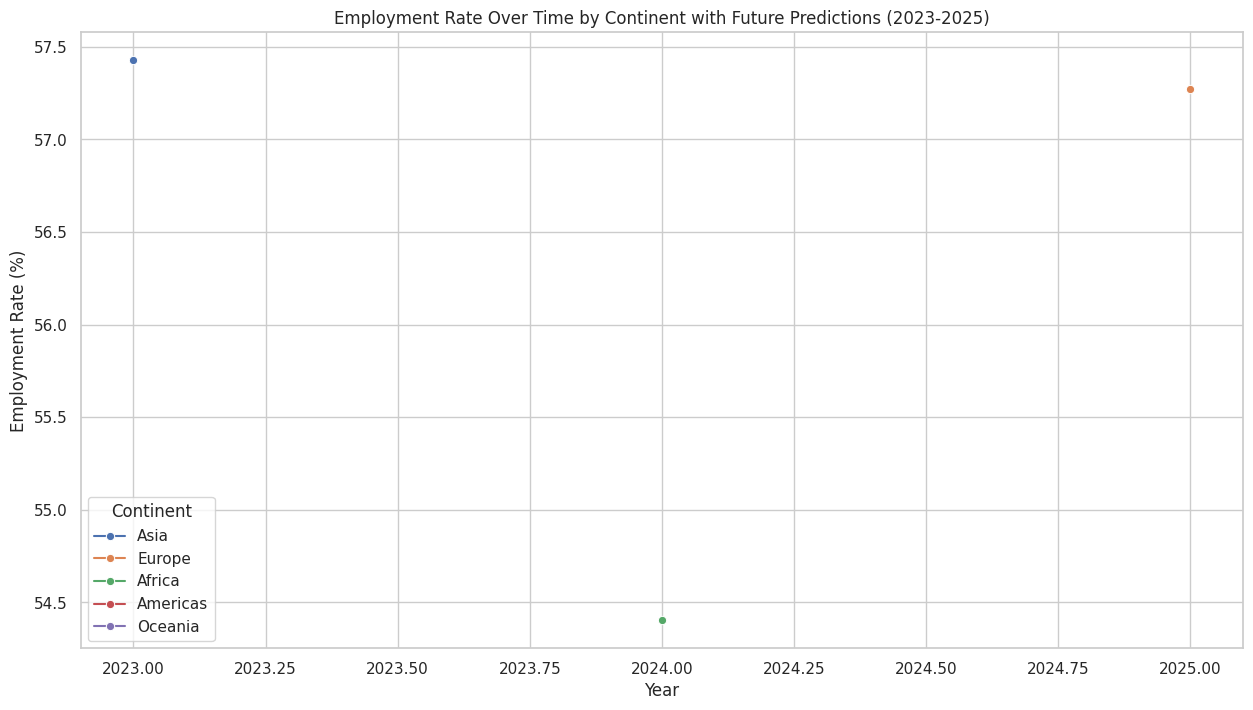

In [160]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your original dataframe containing all data
# Split the data into features and target
X = df.drop('Employment to population ratio, 15+, total (%) (modeled ILO estimate)', axis=1)
y = df['Employment to population ratio, 15+, total (%) (modeled ILO estimate)']

# Define numeric features (exclude 'Country Name' or similar non-numeric columns)
numeric_features = ['GDP (current US$)', 'GDP growth (annual %)',
                    'Inflation, consumer prices (annual %)',
                    'Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)',
                    'Population growth (annual %)', 'Trade (% of GDP)', 'Year']

# Define categorical features
categorical_features = ['Continent']

# Drop 'Country Name' if it exists in the dataset
if 'Country Name' in X.columns:
    X = X.drop('Country Name', axis=1)

# Create and apply the preprocessor pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing to the training and test data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Initialize and train a Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_processed, y_train)

# Predict and evaluate on the test set
y_pred_rf = rf_model.predict(X_test_processed)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"RF Mean Squared Error: {mse_rf}")

# Prepare future data for prediction (for 2023, 2024, and 2025)
future_years = pd.DataFrame({
    'Year': [2023, 2024, 2025],
    'GDP (current US$)': [None, None, None],  # Placeholder values
    'GDP growth (annual %)': [None, None, None],  # Placeholder values
    'Inflation, consumer prices (annual %)': [None, None, None],  # Placeholder values
    'Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)': [None, None, None],  # Placeholder values
    'Population growth (annual %)': [None, None, None],  # Placeholder values
    'Trade (% of GDP)': [None, None, None],  # Placeholder values
    'Continent': ['Asia', 'Africa', 'Europe']  # Example, adjust based on your data
})

# Apply preprocessing to the future data (same as you did for training data)
future_data_processed = preprocessor.transform(future_years)

# Use the trained Random Forest model to make predictions for future years
future_predictions = rf_model.predict(future_data_processed)

# Print predicted employment rates for 2023, 2024, and 2025
print(f"Predicted Employment Rates for Future Years (2023-2025):")
for year, prediction in zip([2023, 2024, 2025], future_predictions):
    print(f"Year: {year}, Employment Rate: {prediction:.2f}%")

# Plot the data with future predictions for each continent
# Add the predicted future data to the original dataframe
future_data_all = pd.DataFrame({
    'Year': [2023, 2024, 2025],
    'Employment Rate': future_predictions,
    'Continent': ['Asia', 'Africa', 'Europe']  # Example, adjust based on your data
})

# Combine the original and future data
df_extended = pd.concat([df, future_data_all], ignore_index=True)

# Plot the data
plt.figure(figsize=(15, 8))
sns.lineplot(data=df_extended, x='Year', y='Employment Rate', hue='Continent', marker='o')
plt.title('Employment Rate Over Time by Continent with Future Predictions (2023-2025)')
plt.xlabel('Year')
plt.ylabel('Employment Rate (%)')
plt.legend(title='Continent')
plt.grid(True)
plt.show()


In [161]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Split the data into training and test sets (2000-2022 for training, 2021-2022 for testing)
train_data = df_renamed[(df_renamed['Year'] >= 2000) & (df_renamed['Year'] <= 2022)]
test_data_2021_2022 = df_renamed[(df_renamed['Year'] == 2021) | (df_renamed['Year'] == 2022)]

# Define the features (excluding 'Country Name' and 'Year') and target variable
X_train = train_data[['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']]
y_train = train_data['Employment Rate']

X_test_2021_2022 = test_data_2021_2022[['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']]
y_test_2021_2022 = test_data_2021_2022['Employment Rate']

# Initialize the Random Forest model (or the model you prefer)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on data from 2000 to 2022
rf_model.fit(X_train, y_train)

# Predict for 2021 and 2022
predictions_2021_2022 = rf_model.predict(X_test_2021_2022)

# Add predictions to the actual data for comparison
test_data_2021_2022['Predicted Employment Rate'] = predictions_2021_2022

# Evaluate model performance (for 2021 and 2022 only)
mae = mean_absolute_error(y_test_2021_2022, predictions_2021_2022)
mse = mean_squared_error(y_test_2021_2022, predictions_2021_2022)
r2 = r2_score(y_test_2021_2022, predictions_2021_2022)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R^2: {r2}")

# Display the comparison
print(test_data_2021_2022[['Country Name', 'Year', 'Employment Rate', 'Predicted Employment Rate']])


MAE: 0.5708061129568093
MSE: 0.6944574212598004
R^2: 0.9940272715674309
                  Country Name  Year  Employment Rate  \
21                 Afghanistan  2021           36.263   
22                 Afghanistan  2022           32.333   
45                     Albania  2021           51.336   
46                     Albania  2022           53.304   
69                     Algeria  2021           34.390   
70                     Algeria  2022           36.593   
141                     Angola  2021           64.304   
142                     Angola  2022           64.447   
189                  Argentina  2021           55.085   
190                  Argentina  2022           56.351   
213                    Armenia  2021           56.445   
214                    Armenia  2022           56.548   
261                  Australia  2021           62.478   
262                  Australia  2022           63.699   
285                    Austria  2021           57.200   
286             

In [162]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Split the data into training (2000-2022) and test data (2021-2022)
train_data = df_renamed[(df_renamed['Year'] >= 2000) & (df_renamed['Year'] <= 2022)]

# Define the features and target variable for training
X_train = train_data[['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']]
y_train = train_data['Employment Rate']

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the data from 2000 to 2022
rf_model.fit(X_train, y_train)

# Define the future years (2023, 2024, 2025)
future_years = [2023, 2024, 2025]

# Initialize an empty list to store future predictions
future_predictions_list = []

# Get the unique countries from the dataset
countries = train_data['Country Name'].unique()

# Iterate through each country to predict for 2023–2025
for country in countries:
    # Get the feature values for the most recent year (2022) for this specific country
    last_known_data_country = train_data[(train_data['Country Name'] == country) & (train_data['Year'] == 2022)]

    # Select only numeric columns (excluding 'Country Name' and 'Year')
    last_known_data_country = last_known_data_country[['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']]

    # Take the mean across the row for the most recent year (2022)
    last_known_data_country = last_known_data_country.mean()

    # Create future feature data for the country using the 2022 values
    future_features_country = pd.DataFrame([last_known_data_country] * 3)  # Create the same row for 2023, 2024, and 2025
    future_features_country['Year'] = future_years  # Assign the years 2023, 2024, 2025

    # Predict for 2023, 2024, and 2025 for this country using the trained model
    predictions_country = rf_model.predict(future_features_country.drop(columns=['Year']))

    # Prepare the future predictions for the country
    future_predictions_country_df = pd.DataFrame({
        'Country Name': [country] * 3,  # Country name for each prediction
        'Year': future_years,
        'Employment Rate': predictions_country,
        'Predicted Employment Rate': predictions_country
    })

    # Append the country's predictions to the list
    future_predictions_list.append(future_predictions_country_df)

# Concatenate all country predictions into a single DataFrame
final_predictions_df = pd.concat(future_predictions_list, ignore_index=True)

# Display the future predictions for all countries
print(final_predictions_df)


                 Country Name  Year  Employment Rate  \
0                 Afghanistan  2023         32.45422   
1                 Afghanistan  2024         32.45422   
2                 Afghanistan  2025         32.45422   
3                     Albania  2023         53.89321   
4                     Albania  2024         53.89321   
5                     Albania  2025         53.89321   
6                     Algeria  2023         36.74519   
7                     Algeria  2024         36.74519   
8                     Algeria  2025         36.74519   
9                      Angola  2023         65.39405   
10                     Angola  2024         65.39405   
11                     Angola  2025         65.39405   
12                  Argentina  2023         55.98904   
13                  Argentina  2024         55.98904   
14                  Argentina  2025         55.98904   
15                    Armenia  2023         55.97885   
16                    Armenia  2024         55.9

In [163]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Split the data into training (2000-2022) and test data (2021-2022)
train_data = df_renamed[(df_renamed['Year'] >= 2000) & (df_renamed['Year'] <= 2022)]

# Define the features and target variable for training
X_train = train_data[['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']]
y_train = train_data['Employment Rate']

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the data from 2000 to 2022
rf_model.fit(X_train, y_train)

# Define the future years (2023, 2024, 2025)
future_years = [2023, 2024, 2025]

# Initialize an empty list to store future predictions
future_predictions_list = []

# Get the unique countries from the dataset
countries = train_data['Country Name'].unique()

# Iterate through each country to predict for 2023–2025
for country in countries:
    # Get the feature values for the most recent year (2022) for this specific country
    last_known_data_country = train_data[(train_data['Country Name'] == country) & (train_data['Year'] == 2022)]

    # Check if data for the country in 2022 is available
    if not last_known_data_country.empty:
        # Select only the numeric columns for the features
        last_known_data_country = last_known_data_country[['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']]

        # Take the values from the most recent year (2022)
        current_features = last_known_data_country.iloc[0]

        # Create a list of future years' predictions for this country
        country_predictions = []

        for year in future_years:
            # Predict employment rate for the current year using the features from the previous year
            predicted_rate = rf_model.predict([current_features])[0]

            # Append the prediction for the current year
            country_predictions.append({
                'Country Name': country,
                'Year': year,
                'Employment Rate': predicted_rate,
                'Predicted Employment Rate': predicted_rate
            })

            # Update the feature values for the next year (keep them the same for simplicity in this case)
            current_features = current_features.copy()
            # You could modify `current_features` here if you expect changes in features over time (e.g., inflation changes)

        # Append the country's predictions to the list
        future_predictions_list.extend(country_predictions)
    else:
        print(f"Data for country {country} in 2022 is missing")

# Convert the list to a DataFrame
final_predictions_df = pd.DataFrame(future_predictions_list)

# Display the future predictions for all countries
print(final_predictions_df)


Data for country Cuba in 2022 is missing
Data for country Liberia in 2022 is missing
Data for country Myanmar in 2022 is missing
Data for country Ukraine in 2022 is missing
                 Country Name  Year  Employment Rate  \
0                 Afghanistan  2023         32.45422   
1                 Afghanistan  2024         32.45422   
2                 Afghanistan  2025         32.45422   
3                     Albania  2023         53.89321   
4                     Albania  2024         53.89321   
5                     Albania  2025         53.89321   
6                     Algeria  2023         36.74519   
7                     Algeria  2024         36.74519   
8                     Algeria  2025         36.74519   
9                      Angola  2023         65.39405   
10                     Angola  2024         65.39405   
11                     Angola  2025         65.39405   
12                  Argentina  2023         55.98904   
13                  Argentina  2024        

In [164]:
import pandas as pd

# Assuming df_capped is your historical data (2000-2022), and you've predicted the missing data for 2023-2025
# Create a DataFrame for the years 2023-2025
years_to_predict = [2023, 2024, 2025]
predicted_data = pd.DataFrame(columns=df_capped.columns)

# Create a function to generate predicted input features for 2023-2025 for each country
def generate_input_features_for_future_years(df, years_to_predict):
    future_features = []

    # For each country, predict or estimate the input features for 2023-2025
    for country in df['Country Name'].unique():
        # Filter the data for the country
        country_data = df[df['Country Name'] == country]

        # Find the most recent data (the latest year in historical data)
        last_data = country_data.iloc[-1]

        # Calculate GDP Growth as the percentage change from the previous year (assumed to stay the same for future years)
        last_gdp = last_data['GDP']
        last_gdp_growth = (last_data['GDP'] - country_data['GDP'].iloc[-2]) / country_data['GDP'].iloc[-2] if len(country_data) > 1 else 0

        # Placeholder for predicted values (replace this with forecasting model if necessary)
        # Example: You can assume the future values follow a similar pattern as the last available year
        predicted_values = last_data[['GDP', 'Inflation', 'Labor Force Rate',
                                      'Population Growth', 'Trade']].values

        # Adding GDP Growth (calculated) to the predicted values
        predicted_values_with_growth = list(predicted_values) + [last_gdp_growth]

        for year in years_to_predict:
            future_features.append([country, year] + predicted_values_with_growth)

    # Convert the future features into a DataFrame
    future_df = pd.DataFrame(future_features, columns=['Country Name', 'Year', 'GDP',
                                                      'Inflation', 'Labor Force Rate',
                                                      'Population Growth', 'Trade', 'GDP Growth'])

    return future_df

# Generate input features for the years 2023-2025
future_features = generate_input_features_for_future_years(df_capped, years_to_predict)

# Combine the historical data with the predicted input features
df_combined = pd.concat([df_capped, future_features], ignore_index=True)

# Check the combined DataFrame
print(df_combined.tail(10))  # Last 10 rows to verify


     Country Name Continent  Year  Employment Rate       GDP  GDP Growth  \
3967   Uzbekistan       NaN  2025              NaN -0.191721   -0.034841   
3968      Vanuatu       NaN  2023              NaN -0.239770   -0.000180   
3969      Vanuatu       NaN  2024              NaN -0.239770   -0.000180   
3970      Vanuatu       NaN  2025              NaN -0.239770   -0.000180   
3971       Zambia       NaN  2023              NaN -0.222893   -0.018661   
3972       Zambia       NaN  2024              NaN -0.222893   -0.018661   
3973       Zambia       NaN  2025              NaN -0.222893   -0.018661   
3974     Zimbabwe       NaN  2023              NaN -0.223971    0.002697   
3975     Zimbabwe       NaN  2024              NaN -0.223971    0.002697   
3976     Zimbabwe       NaN  2025              NaN -0.223971    0.002697   

      Inflation  Labor Force Rate  Population Growth     Trade  
3967   0.090948         -0.541970           0.550325 -0.130474  
3968  -0.140546          0.916633

In [165]:
df_capped.head()

,Country Name,Continent,Year,Employment Rate,GDP,GDP Growth,Inflation,Labor Force Rate,Population Growth,Trade
5,Afghanistan,Asia,2005,43.311,-0.236663,1.081580,0.151142,-1.549435,1.677560,-1.766235
6,Afghanistan,Asia,2006,43.259,-0.236202,0.272020,-0.135433,-1.555623,2.101097,-1.752555
7,Afghanistan,Asia,2007,43.216,-0.234537,1.081580,-0.043368,-1.560926,0.336402,-1.809552
8,Afghanistan,Asia,2008,43.178,-0.234321,0.038131,0.405317,-1.565235,0.493686,-1.804472
9,Afghanistan,Asia,2009,43.153,-0.232937,1.081580,-0.478389,-1.568440,1.666114,-1.766604


In [166]:

df.head()

,Country Name,Continent,Year,"Employment to population ratio, 15+, total (%) (modeled ILO estimate)",GDP (current US$),GDP growth (annual %),"Inflation, consumer prices (annual %)","Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)",Population growth (annual %),Trade (% of GDP)
5,Afghanistan,Asia,2005,43.311,6.203257e+09,11.229715,12.686269,47.039,3.576508,3.576508
6,Afghanistan,Asia,2006,43.259,6.971758e+09,5.357403,6.784597,46.983,4.139678,4.139678
7,Afghanistan,Asia,2007,43.216,9.747886e+09,13.826320,8.680571,46.935,1.793196,1.793196
8,Afghanistan,Asia,2008,43.178,1.010930e+10,3.924984,26.418664,46.896,2.002333,2.002333
9,Afghanistan,Asia,2009,43.153,1.241615e+10,21.390528,-6.811161,46.867,3.561288,3.561288


In [167]:
df_renamed.head()

,Country Name,Continent,Year,Employment Rate,GDP,GDP Growth,Inflation,Labor Force Rate,Population Growth,Trade
5,Afghanistan,Asia,2005,43.311,-0.236663,1.230864,0.151142,-1.442052,1.381362,-1.441126
6,Afghanistan,Asia,2006,43.259,-0.236202,0.272020,-0.135433,-1.447786,1.736699,-1.430416
7,Afghanistan,Asia,2007,43.216,-0.234537,1.654843,-0.043368,-1.452700,0.256165,-1.475040
8,Afghanistan,Asia,2008,43.178,-0.234321,0.038131,0.817964,-1.456693,0.388122,-1.471062
9,Afghanistan,Asia,2009,43.153,-0.232937,2.889944,-0.795620,-1.459663,1.371759,-1.441415


In [191]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Assuming your original dataset is already loaded into df
features_to_forecast = [
    'GDP (current US$)',
    'GDP growth (annual %)',
    'Inflation, consumer prices (annual %)',
    'Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)',
    'Population growth (annual %)',
    'Trade (% of GDP)'
]

# Step 1: Create an empty DataFrame to store the forecast results for all countries
forecast_all_countries = []

# Step 2: Iterate through each country in the dataset
for country in df['Country Name'].unique():
    # Filter data for the current country
    country_data = df[df['Country Name'] == country]

    # Step 3: Forecast each feature for the current country
    forecast_results_country = {'Country Name': country}

    for feature in features_to_forecast:
        # Extract the historical data for the feature
        feature_data = country_data[['Year', feature]].dropna()
        feature_data.set_index('Year', inplace=True)

        # ARIMA model (example with order=(1,1,1), you can adjust this based on your dataset)
        model = ARIMA(feature_data[feature], order=(1, 1, 1))
        model_fit = model.fit()

        # Forecast the next 3 years (2023, 2024, 2025)
        forecast = model_fit.forecast(steps=3)

        # Add forecast values to the results
        forecast_results_country[feature] = forecast

    # Add forecast data for the country to the main list
    forecast_all_countries.append(forecast_results_country)

# Step 4: Combine all country forecasts into a single DataFrame
forecast_combined = pd.DataFrame(forecast_all_countries)

# Step 5: Reshape the data to match the number of forecasted years for each country
forecast_combined = pd.DataFrame({
    'Country Name': np.repeat(df['Country Name'].unique(), 3),  # Repeat countries 3 times for each forecast year
    'Year': [2023, 2024, 2025] * len(df['Country Name'].unique())  # Repeat the years 2023, 2024, 2025
})

# Step 6: Merge the forecasted features with the country names and years
for feature in features_to_forecast:
    forecast_combined[feature] = np.concatenate([forecast_results_country[feature] for forecast_results_country in forecast_all_countries])

# Step 7: Rename columns to match the transformed dataset (df_renamed)
forecast_combined.rename(columns={
    'GDP (current US$)': 'GDP',
    'GDP growth (annual %)': 'GDP Growth',
    'Inflation, consumer prices (annual %)': 'Inflation',
    'Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)': 'Labor Force Rate',
    'Population growth (annual %)': 'Population Growth',
    'Trade (% of GDP)': 'Trade'
}, inplace=True)

# Step 8: Display the forecasted results
print(forecast_combined)


                 Country Name  Year           GDP  GDP Growth   Inflation  \
0                 Afghanistan  2023  1.400603e+10   -9.340156   34.535821   
1                 Afghanistan  2024  1.357850e+10   -8.744667   33.703660   
2                 Afghanistan  2025  1.321008e+10   -8.859057   33.480576   
3                     Albania  2023  1.955229e+10    3.818303    2.311447   
4                     Albania  2024  2.018429e+10    3.855457    2.556181   
5                     Albania  2025  2.081241e+10    3.854127    2.542611   
6                     Algeria  2023  2.288031e+11    2.189254    6.529110   
7                     Algeria  2024  2.275373e+11    2.009594    5.843673   
8                     Algeria  2025  2.280314e+11    1.986714    5.671980   
9                      Angola  2023  1.132799e+11    1.148024   22.043578   
10                     Angola  2024  1.119750e+11    1.102194   22.356072   
11                     Angola  2025  1.121667e+11    1.101087   22.497949   

In [169]:
forecast_combined.head()

,Country Name,Year,GDP,GDP Growth,Inflation,Labor Force Rate,Population Growth,Trade
0,Afghanistan,2023,1.400603e+10,-9.340156,34.535821,35.602417,2.946428,82.245914
1,Afghanistan,2024,1.357850e+10,-8.744667,33.703660,33.691837,3.055740,90.278384
2,Afghanistan,2025,1.321008e+10,-8.859057,33.480576,31.900344,3.084747,97.171281
3,Albania,2023,1.955229e+10,3.818303,2.311447,59.772884,-1.267068,80.164970
4,Albania,2024,2.018429e+10,3.855457,2.556181,59.350469,-1.294112,78.287202


In [216]:
from sklearn.preprocessing import StandardScaler

# Select numeric features for scaling
numeric_features = ['GDP', 'GDP Growth', 'Inflation', 'Labor Force Rate', 'Population Growth', 'Trade']

# Initialize the scaler
scaler = StandardScaler()

# Scale the numeric features
forecast_combined[numeric_features] = scaler.fit_transform(forecast_combined[numeric_features])

# Check the scaled values
forecast_combined.head()


,Country Name,Year,GDP,GDP Growth,Inflation,Labor Force Rate,Population Growth,Trade
0,Afghanistan,2023,-0.225284,-2.361592,0.875348,-2.621479,1.259473,-0.010733
1,Afghanistan,2024,-0.225440,-2.247992,0.839217,-2.816032,1.329929,0.121319
2,Afghanistan,2025,-0.225574,-2.269814,0.829531,-2.998459,1.348626,0.234638
3,Albania,2023,-0.223259,0.148615,-0.523799,-0.160212,-1.456310,-0.044944
4,Albania,2024,-0.223028,0.155703,-0.513173,-0.203226,-1.473742,-0.075814


In [217]:
# Check for missing years in df_renamed
required_years = [2023, 2024, 2025]
existing_years = df['Year'].unique()

# Add rows for missing years
missing_years = [year for year in required_years if year not in existing_years]
if missing_years:
    print(f"Missing years detected: {missing_years}")
    new_rows = []
    countries = df['Country Name'].unique()

    for country in countries:
        last_row = df[df['Country Name'] == country].iloc[-1]
        for year in missing_years:
            new_row = last_row.copy()
            new_row['Year'] = year
            # Optionally, adjust features for future years
            for feature in features:
                new_row[feature] += np.random.normal(0, 0.01)  # Add slight variation
            new_rows.append(new_row)

    # Append new rows to df
    df = pd.concat([df, pd.DataFrame(new_rows)], ignore_index=True)

# Now proceed with predictions
future_data = df[(df['Year'] >= 2023) & (df['Year'] <= 2025)]
X_future = future_data[features]
X_future_scaled = scaler.transform(X_future)

# Predict employment rates for 2023-2025
future_data['Predicted Employment Rate'] = rf_model.predict(X_future_scaled)

# Show results for future predictions
print("Predictions for 2023-2025:")
print(future_data[['Country Name', 'Year', 'Predicted Employment Rate']])


Predictions for 2023-2025:
                  Country Name  Year  Predicted Employment Rate
3515               Afghanistan  2023                   32.91097
3516               Afghanistan  2024                   32.95682
3517               Afghanistan  2025                   32.88919
3518                   Albania  2023                   54.44027
3519                   Albania  2024                   55.27447
3520                   Albania  2025                   54.07068
3521                   Algeria  2023                   37.19020
3522                   Algeria  2024                   37.28300
3523                   Algeria  2025                   37.24303
3524                    Angola  2023                   66.91311
3525                    Angola  2024                   67.36172
3526                    Angola  2025                   66.52277
3527                 Argentina  2023                   55.45430
3528                 Argentina  2024                   54.85360
3529         

In [218]:
# Combine historical data (df_renamed) and future predictions (future_data)
combined_data = pd.concat([df_renamed[['Country Name', 'Year', 'Employment Rate', 'Continent']], future_data[['Country Name', 'Year', 'Predicted Employment Rate', 'Continent']]])

# Rename the 'Predicted Employment Rate' to 'Employment Rate' for consistency
combined_data['Employment Rate'] = combined_data['Employment Rate'].fillna(combined_data['Predicted Employment Rate'])

# Plot time series for each continent, including historical and predicted data
plt.figure(figsize=(15, 8))

sns.lineplot(data=combined_data, x='Year', y='Employment Rate', hue='Continent', marker='o', palette=['black', 'red', 'gold', 'green', 'blue'])

plt.title('Employment Rate Over Time by Continent (Including Predictions for 2023-2025)')
plt.xlabel('Year')
plt.ylabel('Employment Rate (%)')
plt.legend(title='Continent')
plt.grid(True)
plt.show()


KeyError: "['Country Name'] not in index"

In [209]:
# Combine historical data (df_renamed) and future predictions (future_data)
combined_data = pd.concat([df_renamed[['Country Name', 'Year', 'Employment Rate', 'Continent']],
                           future_data[['Country Name', 'Year', 'Predicted Employment Rate', 'Continent']]])

# Rename the 'Predicted Employment Rate' to 'Employment Rate' for consistency
combined_data['Employment Rate'] = combined_data['Employment Rate'].fillna(combined_data['Predicted Employment Rate'])

# Add a 'Data Type' column to distinguish historical and predicted data
combined_data['Data Type'] = combined_data['Employment Rate'].apply(lambda x: 'Prediction' if pd.isna(x) else 'Historical')

# Plot time series for each continent, including historical and predicted data
plt.figure(figsize=(15, 8))

# Use 'style' argument to differentiate between Historical and Predicted data
sns.lineplot(data=combined_data, x='Year', y='Employment Rate', hue='Continent', style='Data Type', markers=['o', 'X'], palette=['black', 'red', 'gold', 'green', 'blue'])

plt.title('Employment Rate Over Time by Continent (Including Predictions for 2023-2025)')
plt.xlabel('Year')
plt.ylabel('Employment Rate (%)')
plt.legend(title='Continent')
plt.grid(True)
plt.show()


KeyError: "['Country Name'] not in index"